>## <b> Evaluation Project 3:Avacado Project  </b>
<b><em> By: Ms. Yashshree bawiskar </em></b>

<b><em> Batch: 1838 </em></b>

**Evaluation Project - 3**

**Avacado Project**

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

Now We will do the pre data processing

**1. Importing the required Liabaries** 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
df.shape

(18249, 14)

- 1. Here we got the information that in the given dataset having 18249 no. of rows and 14 no. of columns
- 2. As we seen that in the given dataset 18249 rows available, so before moving forward we have to check the below mentioned things:
    -   is any Missing value available or not in the dataset
    -   we need to check the types of data and some statstical features from which we get clear idea is the given problem is of regression or classification.

In [4]:
# Now will check the data types and other other information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


From the above line we come to know following observations:
- 1. 'unnamed'  and 'year' columns contained intergered type data.
- 2. 'date','type' and 'year' columns contained object type data 
- 3.  while other columns likes Average price, total volume, 4046,4225,4770, total bag, etc. having float data approx 9 columns.

In [5]:
# Now will Check Null Values using null.sum() function

df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

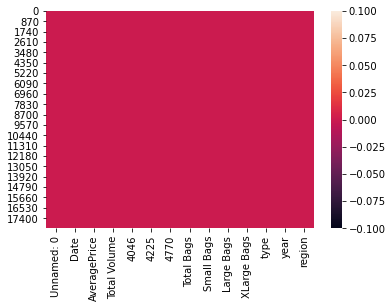

In [6]:
# Now will plot the heatmap for finding is there any nan value available in the dataset

sns.heatmap(df.isnull())

From the above 2 lines its clear that there is no null value present in the given dataset

- Now will check some stastical data using df.describe function

In [7]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

Tried to see the data but a few coulmns are missing and the data looks messed, now will try to transforme the data from which we get clear idea about the data which we have

<AxesSubplot:>

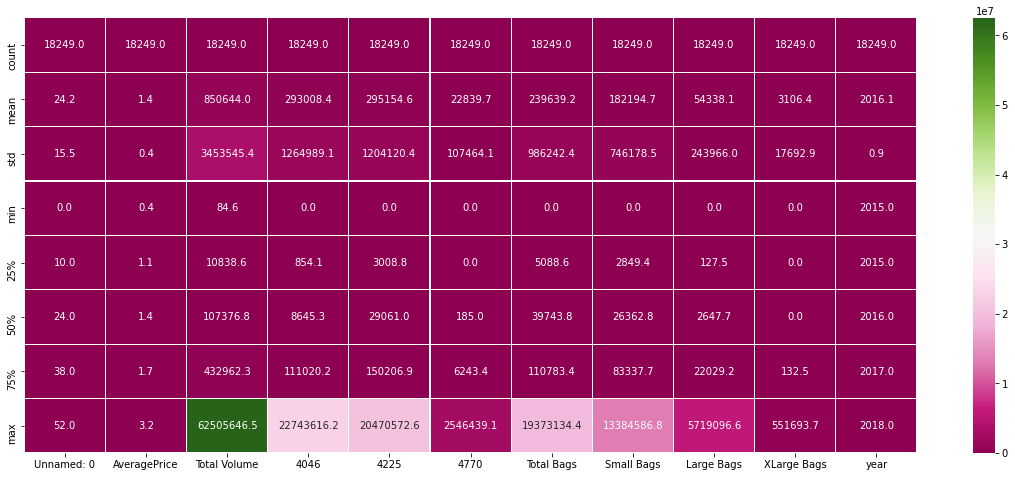

In [8]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [9]:
df.describe().T

count           mean           std      min       25%  \
Unnamed: 0    18249.0      24.232232  1.548104e+01     0.00     10.00   
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   

                    50%        75%          max  
Unnamed: 0        24.00      38.00        52.00  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00

1. As we are able to see that unnamed column contained the row number which is not useful to us for prediction, so we will drop it furhter step.
2. from the above table we get the information about the minimum value of average price is 0.44 and maximum value of average price is 3.25
3. Also we get to know that the total volume having the minimum value of 84.56 and maximum value  of 62505646.52
4. Also got the  information about the average price given in table for year 2015 to 2018
5. As we are able to see the count of row is 18249 it is meant that there is no missing data
6. There is high variance in all the columns except for Average price and year column. 
7. Difference between min, max and interquartile ranges is uneven hence there are a no. of outliers present in the data.

**What are exactly  4046, 4225 and 4770?**

by Reading of avocado varieties: https://producebrands.com/the-avocado/  came to know the following information:


4046 = **Hass – small**
4225 = **Hass –large**
4770 = **Hass Extra Large**
We will rename the columns accordingly.

In [10]:
df = df.rename(columns = {'4046': 'small', '4225': 'large', '4770': 'xl'})
df.head()


Unnamed: 0        Date  AveragePrice  Total Volume    small      large  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

       xl  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [11]:
df["Date"]=pd.to_datetime(df["Date"])

In [12]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
small                  float64
large                  float64
xl                     float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [13]:
#Extracting month from Date column
df["Month"]=df["Date"].dt.month

In [14]:
#Extracting day from Date column
df["Day"]=df["Date"].dt.day

In [15]:
df.head()

Unnamed: 0       Date  AveragePrice  Total Volume    small      large  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

       xl  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  Month  Day  
0  2015  Albany     12   27  
1  2015  Albany     12   20  
2  2015  Albany     12   13  
3  2015  Albany     12    6  
4  2015  Albany     11   29

In [16]:
df['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

**As we already dicussed to drop the feature of 'unnamed' from data set, Now we are dropping it, which is no longer we required for further evaluation.**

In [17]:
df= df.drop(columns = 'Unnamed: 0')
df.head()

Date  AveragePrice  Total Volume    small      large      xl  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

In [18]:
df.tail()

Date  AveragePrice  Total Volume    small    large      xl  \
18244 2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  Month  Day  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7

## Now we will check the unique value

In [19]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
small           17702
large           18103
xl              12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

**All the unique values present in each column are segregated and listed here. This gives us an insight on how many categorical options like type and year are present and how many simply have continous data present in them.**

- Now will check the is there skewness present in the dataset or not

In [20]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
small            8.648220
large            8.942466
xl              10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

The acceptable range for skewness is between +/-0.5. And we see almost all feature columns with skewness for now. Once we have processed the data further we may check for the skewness details again and if it still persists then we will need to treat it accordingly.

If we compare the data.head() and data.describe(), we notice that 'type' and 'region' columns were dropped out from the descriptive statistics table as they were text (or categorical data). However, we can study how many unique values these variables contain and the distribution of the values.

In [21]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [22]:
# How many rows i.e., observations there are for each type?         

df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [23]:
# Display the descriptive statistics grouped by 'type'          

df.groupby('type').describe()

AveragePrice                                                    \
                    count      mean       std   min   25%   50%   75%   max   
type                                                                          
conventional       9126.0  1.158040  0.263041  0.46  0.98  1.13  1.32  2.22   
organic            9123.0  1.653999  0.363502  0.44  1.42  1.63  1.87  3.25   

             Total Volume                ... Month           Day             \
                    count          mean  ...   75%   max   count       mean   
type                                     ...                                  
conventional       9126.0  1.653213e+06  ...   9.0  12.0  9126.0  15.662722   
organic            9123.0  4.781121e+04  ...   9.0  12.0  9123.0  15.662501   

                                                    
                   std  min  25%   50%   75%   max  
type                                                
conventional  8.776381  1.0  8.0  16.0  23.0  31.0  
organic       8.776662  1.0  8.0  16.0  23.0  31.0  

[2 rows x 96 columns]

In [24]:
# Display the descriptive statistics for 'AveragePrice' grouped by 'type'               

data_by_type = df.groupby('type')
data_by_type['AveragePrice'].describe()

count      mean       std   min   25%   50%   75%   max
type                                                                  
conventional  9126.0  1.158040  0.263041  0.46  0.98  1.13  1.32  2.22
organic       9123.0  1.653999  0.363502  0.44  1.42  1.63  1.87  3.25

In [25]:
# Now finding  the mean  of AveragePrice    

df['AveragePrice'].mean()

1.4059784097758825

In [26]:
# Now Printing the mean with two decimals only by using round()command

m = df['AveragePrice'].mean()
print('Mean value of AveragePrice = ', round(m,2))

Mean value of AveragePrice =  1.41


In [27]:
#  Now finding  the standard deviation of Average Price      

s = df['AveragePrice'].std()
print('Standard Deviation of AveragePrice = ', round(m,2))

Standard Deviation of AveragePrice =  1.41


In [28]:
# Now Comparing the mean of AveragePrice between different types              

df['AveragePrice'].groupby(df['type']).mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

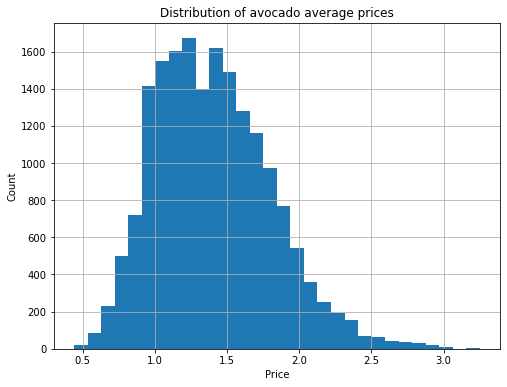

In [29]:
#  Now Plotting the distribution of the average prices using Histogram 
df.hist(column = 'AveragePrice', bins = 30, figsize = (8, 6))
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of avocado average prices')
plt.show()

Now checking the distribution of average price by ploting various type of distributions

In [30]:
background_color = '#F8EDF4'
color_palette = ['#F78904', '#00C73C', '#D2125E', '#693AF9', '#B20600', '#007CDE', '#994936', '#886A00', '#39BBC2']

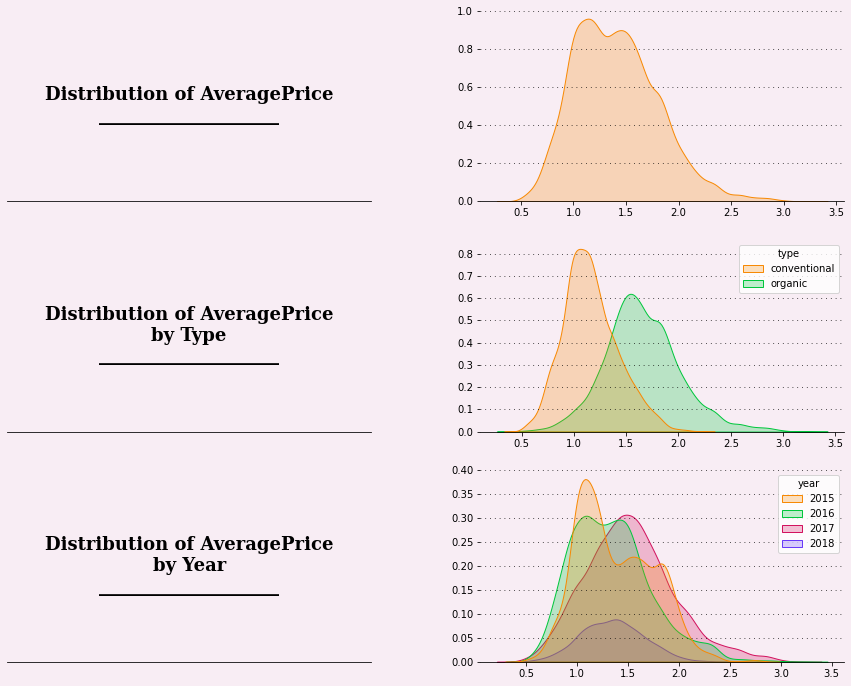

In [31]:
fig = plt.figure(figsize=(15, 12))
GS = fig.add_gridspec(3, 2)
GS.update(hspace=0.2, wspace=0.3)

ax0 = fig.add_subplot(GS[0, 0])
ax1 = fig.add_subplot(GS[0, 1])
ax2 = fig.add_subplot(GS[1, 0])
ax3 = fig.add_subplot(GS[1, 1])
ax4 = fig.add_subplot(GS[2, 0])
ax5 = fig.add_subplot(GS[2, 1])
fig.patch.set_facecolor(background_color)

axes = [ax0, ax1, ax2, ax3, ax4, ax5]


# Title1
ax0.text(0.5, 0.5, 'Distribution of AveragePrice\n____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold', fontfamily='serif')

# Graph1
sns.kdeplot(x='AveragePrice', data=df, fill=True, ax=ax1, color=color_palette[0])



# Title2
ax2.text(0.5, 0.5, 'Distribution of AveragePrice\nby Type\n____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold', fontfamily='serif')

# Graph2
sns.kdeplot(x='AveragePrice', data=df, fill=True, hue='type', ax=ax3, palette=color_palette[:2])



# Title3
ax4.text(0.5, 0.5, 'Distribution of AveragePrice\nby Year\n____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold', fontfamily='serif')

# Graph3
sns.kdeplot(x='AveragePrice', data=df, fill=True, hue='year', ax=ax5, palette=color_palette[:4])



# Settings
for ax in axes:
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

for ax in [ax0, ax2, ax4]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
   
        
for ax in [ax1, ax3, ax5]:
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax.set_xlabel('')
    ax.set_ylabel('')

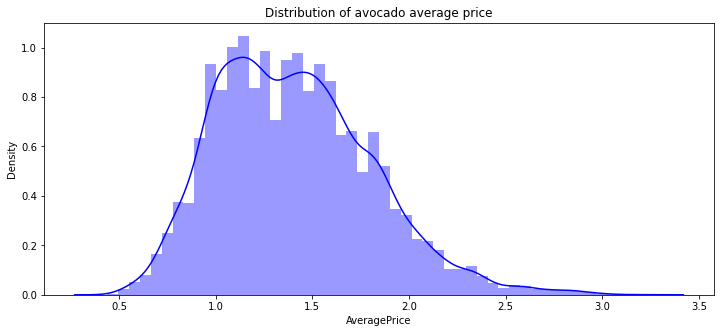

In [32]:
# creating distribution plot of 'AveragePrice'            

plt.figure(figsize=(12,5))
plt.title("Distribution of avocado average price")
ax = sns.distplot(df["AveragePrice"], color = 'b')
plt.show()

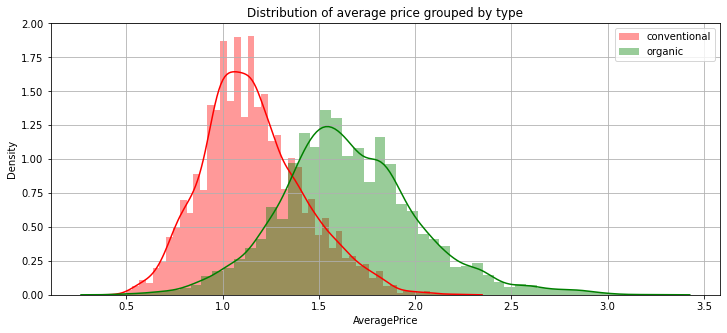

In [33]:
# Now plotting overlay the distribution of average price grouped by type        

#set figure size
plt.figure(figsize=(12,5))

# Plot the distribution of conventional type data
sns.distplot(df["AveragePrice"][df['type'] == 'conventional'], color = 'r', label = 'conventional')
sns.distplot(df["AveragePrice"][df['type'] == 'organic'], color = 'g', label = 'organic')

# add legend, show the graphics
plt.legend()
plt.grid()
plt.title("Distribution of average price grouped by type")
plt.show()

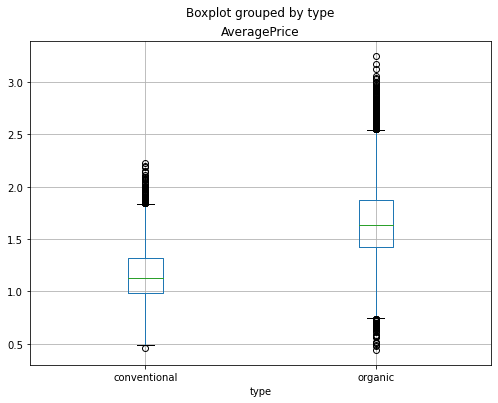

In [34]:
# now ploting boxplot using pandas

df.boxplot(column = 'AveragePrice', by = 'type', figsize = (8,6))
plt.show()

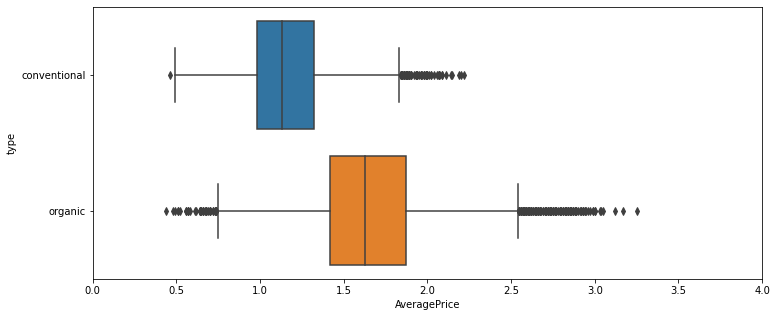

In [35]:
plt.figure(figsize=(12,5))
sns.boxplot(y = "type", x = "AveragePrice", data = df)
plt.xlim([0, 4])
plt.show()

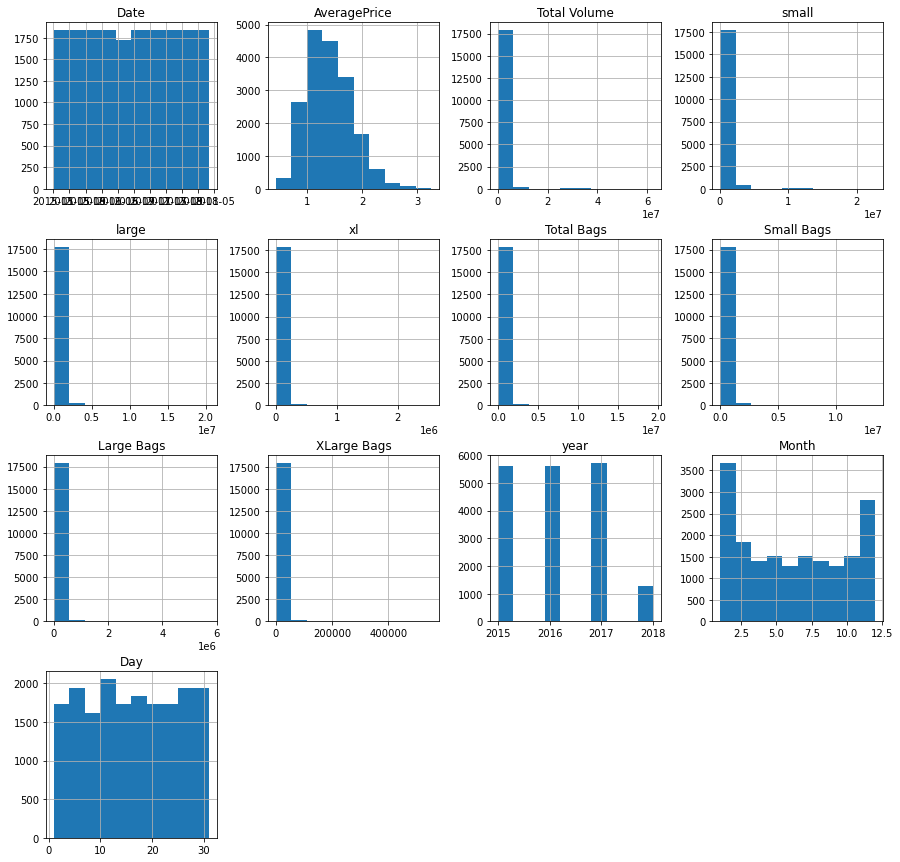

In [36]:
df.iloc[:,:].hist(figsize=(15,15))
plt.show()

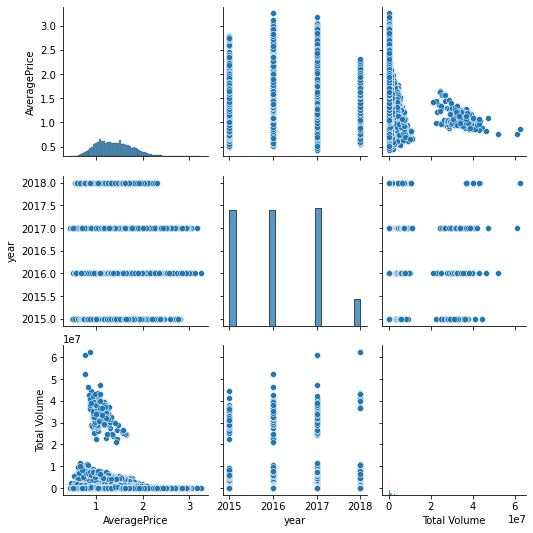

In [37]:
PP=df[['AveragePrice', 'type','year','Total Volume','region']]
sns.pairplot(PP)
plt.show()

conventional    9126
organic         9123
Name: type, dtype: int64

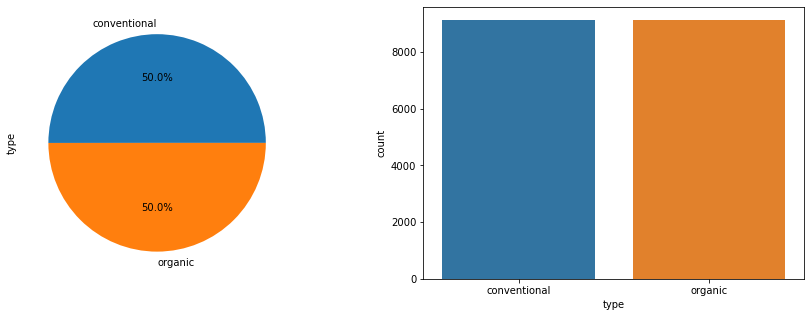

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['type'])
df['type'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

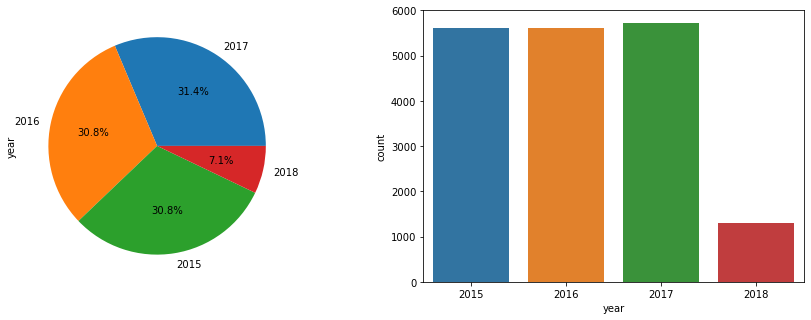

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['year'])
df['year'].value_counts()

Most of the data having in 2017 followed by 2016 and 2015 respectively, while  year 2018 have a least data

Total number of regions 54


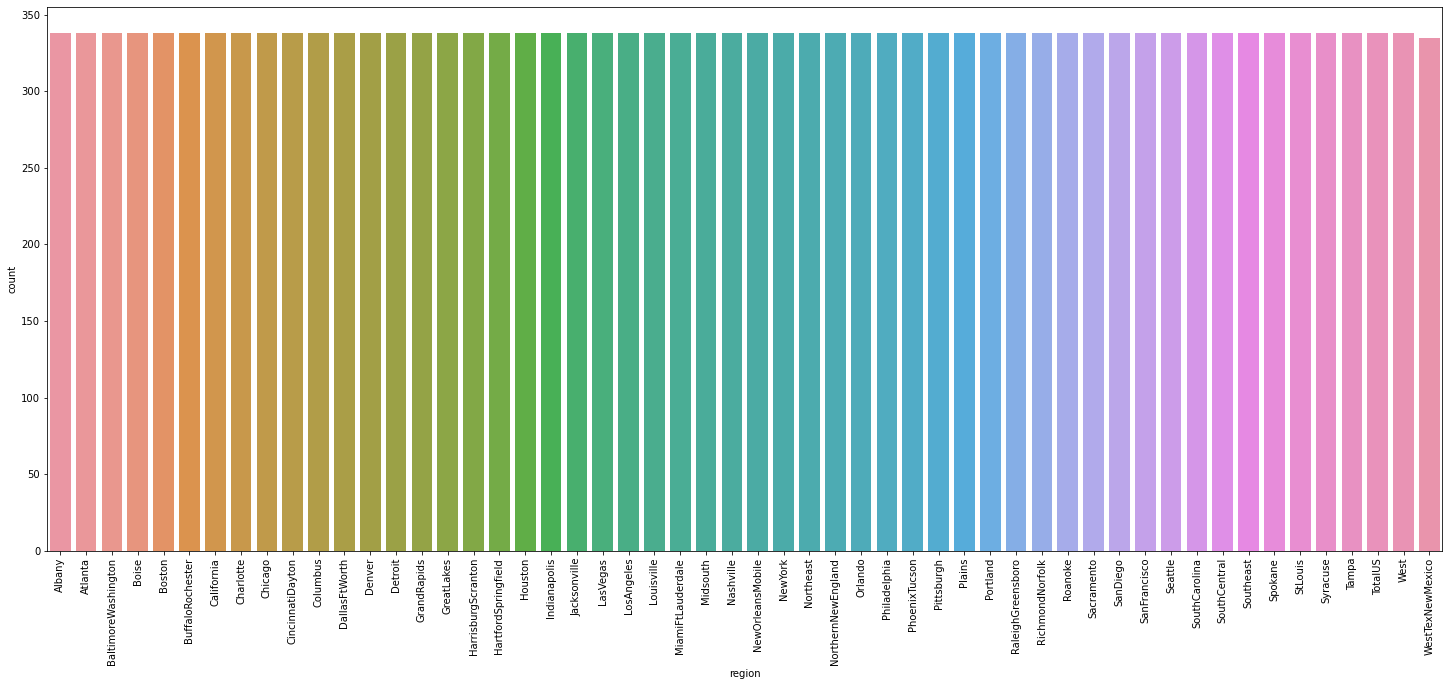

In [40]:
plt.figure(figsize=(25,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
print('Total number of regions',df['region'].nunique())

- There are 54 regions in total. All the region produces almost equal amounts of avocados except for west tex new mexico which has slightly less number.


Minimum 0.44
Maximum 3.25


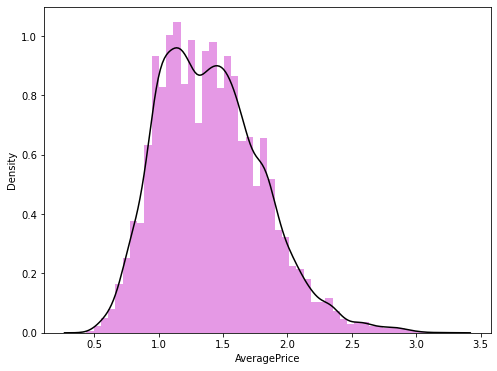

In [41]:
plt.figure(figsize=(8,6))
sns.distplot(df['AveragePrice'],color='m', kde_kws={"color": "k"})
print('Minimum',df['AveragePrice'].min())
print('Maximum',df['AveragePrice'].max())

In [42]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

Minimum 84.56
Maximum 62505646.52


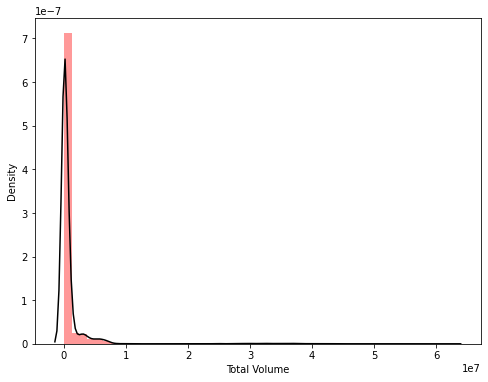

In [43]:
plt.figure(figsize=(8,6))
sns.distplot(df['Total Volume'],color='r', kde_kws={"color": "k"})
print('Minimum',df['Total Volume'].min())
print('Maximum',df['Total Volume'].max())

Most of the Total volume of Avacados is concentrated below 1e7 volumes while it goes upto 62505646.52 volumes. Data is higly skewed to the right, which needs to be taken care of ahead.

Minimum 0.0
Maximum 22743616.17


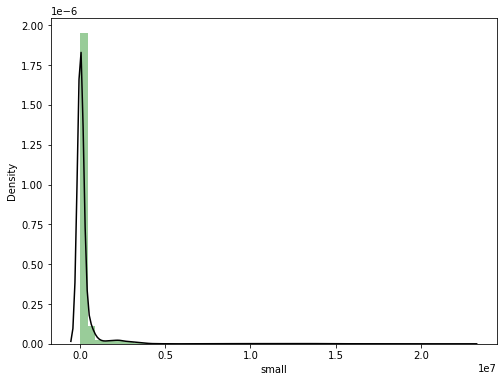

In [44]:
plt.figure(figsize=(8,6))
sns.distplot(df['small'],color='g', kde_kws={"color": "k"})
print('Minimum',df['small'].min())
print('Maximum',df['small'].max())

Minimum 0.0
Maximum 2546439.11


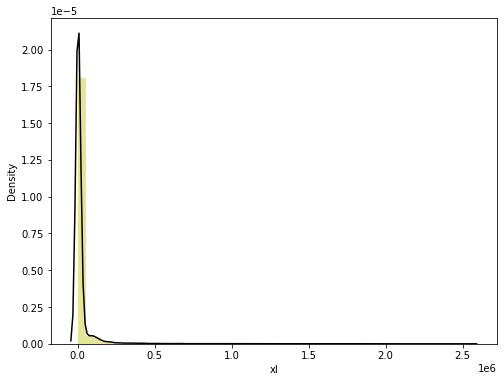

In [45]:
plt.figure(figsize=(8,6))
sns.distplot(df['xl'],color='y', kde_kws={"color": "k"})
print('Minimum',df['xl'].min())
print('Maximum',df['xl'].max())

Avacados with Product feature xl is mostly concentrated near the minimum and the minimum equal to 0, whereas the range goes up to 2546439.11 as the maximum. Data is higly skewed to the right, which needs to be taken care of ahead in the data engineering process

Minimum 0.0
Maximum 20470572.61


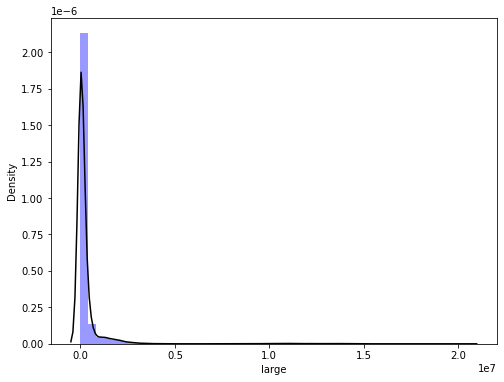

In [46]:
plt.figure(figsize=(8,6))
sns.distplot(df['large'],color='b', kde_kws={"color": "k"})
print('Minimum',df['large'].min())
print('Maximum',df['large'].max())

Avacados with Product feature large is mostly concentrated near the minimum and the minimum equal to 0, whereas the range goes up to 20470572.61 as the maximum. Data is higly skewed to the right, which needs to be taken care of ahead in the data engineering process.

In [47]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

Total Volume AveragePrice
                              sum          sum
region                                        
Albany               1.606780e+07       527.63
Atlanta              8.860512e+07       452.23
BaltimoreWashington  1.347139e+08       518.57
Boise                1.441319e+07       455.67
Boston               9.727398e+07       517.44
BuffaloRochester     2.296247e+07       512.69
California           1.028982e+09       471.62
Charlotte            3.555554e+07       542.84
Chicago              1.337023e+08       526.19
CincinnatiDayton     4.452201e+07       408.71
Columbus             2.999336e+07       423.44
DallasFtWorth        2.084193e+08       366.93
Denver               1.389025e+08       411.88
Detroit              6.342242e+07       431.32
GrandRapids          3.021174e+07       508.69
GreatLakes           5.896425e+08       452.43
HarrisburgScranton   4.180886e+07       511.49
HartfordSpringfield  5.067054e+07       614.70
Houston              2.031679e+08       354.20
Indianapolis         3.026339e+07       444.13
Jacksonville         2.879000e+07       510.70
LasVegas             5.437691e+07       466.75
LosAngeles           5.078965e+08       411.01
Louisville           1.609700e+07       434.90
MiamiFtLauderdale    9.767322e+07       482.83
Midsouth             5.083494e+08       474.81
Nashville            3.561209e+07       409.69
NewOrleansMobile     4.569514e+07       441.02
NewYork              2.407341e+08       583.92
Northeast            7.132809e+08       541.45
NorthernNewEngland   7.153289e+07       499.36
Orlando              5.866070e+07       509.10
Philadelphia         7.183880e+07       551.66
PhoenixTucson        1.956433e+08       413.86
Pittsburgh           1.880635e+07       461.14
Plains               3.111885e+08       485.54
Portland             1.105522e+08       445.39
RaleighGreensboro    4.820273e+07       525.63
RichmondNorfolk      4.223085e+07       436.47
Roanoke              2.504201e+07       421.80
Sacramento           7.516375e+07       548.09
SanDiego             8.979192e+07       472.58
SanFrancisco         1.358302e+08       609.82
Seattle              1.092142e+08       487.59
SouthCarolina        6.075377e+07       474.31
SouthCentral         1.011280e+09       372.22
Southeast            6.152384e+08       472.53
Spokane              1.556528e+07       488.61
StLouis              3.207283e+07       483.55
Syracuse             1.094267e+07       513.87
Tampa                6.600454e+07       476.19
TotalUS              5.864740e+09       445.83
West                 1.086779e+09       430.01
WestTexNewMexico     1.445218e+08       422.67

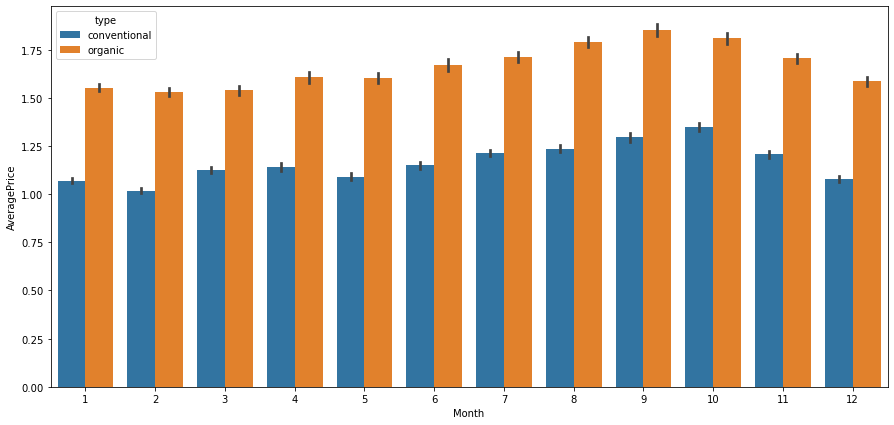

In [48]:
plt.figure(figsize=(15,7))
sns.barplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

<Figure size 720x720 with 0 Axes>

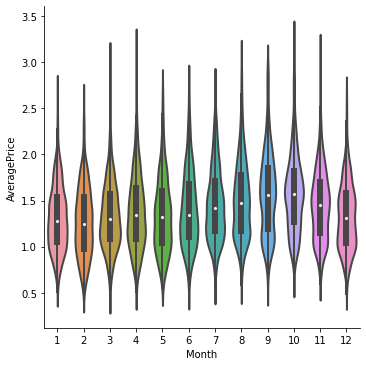

In [49]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df, linewidth=2)
plt.show()

### Now will check the distribution of  continous features

In [50]:
CF = ['Total Volume', 'small', 'large', 'xl', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

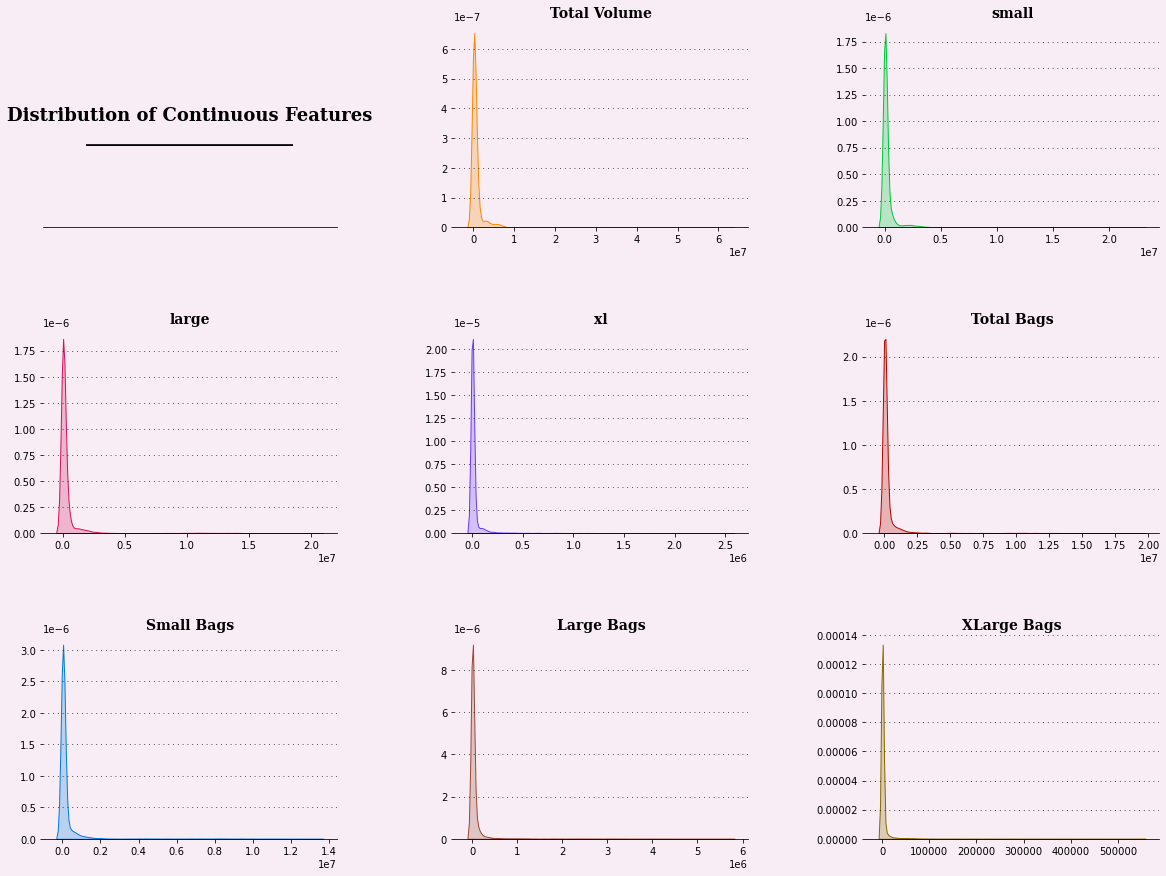

In [51]:
fig = plt.figure(figsize=(20, 15))
GS = fig.add_gridspec(3, 3)
GS.update(wspace=0.4, hspace=0.5)

ax0 = fig.add_subplot(GS[0, 0])
ax1 = fig.add_subplot(GS[0, 1])
ax2 = fig.add_subplot(GS[0, 2])
ax3 = fig.add_subplot(GS[1, 0])
ax4 = fig.add_subplot(GS[1, 1])
ax5 = fig.add_subplot(GS[1, 2])
ax6 = fig.add_subplot(GS[2, 0])
ax7 = fig.add_subplot(GS[2, 1])
ax8 = fig.add_subplot(GS[2, 2])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

fig.patch.set_facecolor(background_color)

# Title
ax0.text(0.5, 0.5, 'Distribution of Continuous Features\n_______________________',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')

# Graphs
for i, ax in enumerate(axes):
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)
        
    ax.set_facecolor(background_color)
    
    if i == 0:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)
       
    else:
        ax.set_title(CF[i-1], fontsize=14, fontfamily='serif', fontweight='bold')
        ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
        sns.kdeplot(x=CF[i-1], data=df, ax=ax, color=color_palette[i-1], fill=True)
        ax.set_xlabel('')
        ax.set_ylabel('')

From the above graphs its clears that in all the continous features having the  some amount right side sknewness as all graphs are sknew to right side. We will treat the sknew ness in futher steps

Minimum 0.0
Maximum 13384586.8


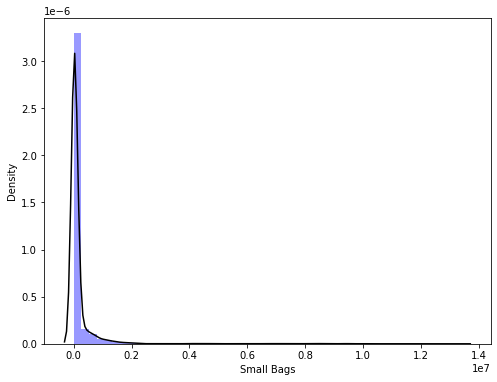

In [52]:
plt.figure(figsize=(8,6))
sns.distplot(df['Small Bags'],color='b', kde_kws={"color": "k"})
print('Minimum',df['Small Bags'].min())
print('Maximum',df['Small Bags'].max())

Minimum 0.0
Maximum 5719096.61


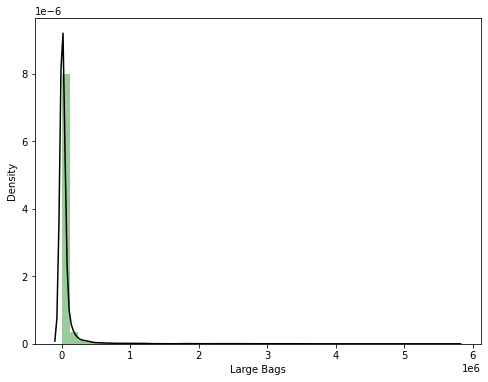

In [53]:
plt.figure(figsize=(8,6))
sns.distplot(df['Large Bags'],color='g', kde_kws={"color": "k"})
print('Minimum',df['Large Bags'].min())
print('Maximum',df['Large Bags'].max())

Large bags has most of its density near to its minimum value which is 0 and goes up to a range of 5719096.61 with its maximum value. Data is clearly skewed to the right.

Minimum 0.0
Maximum 551693.65


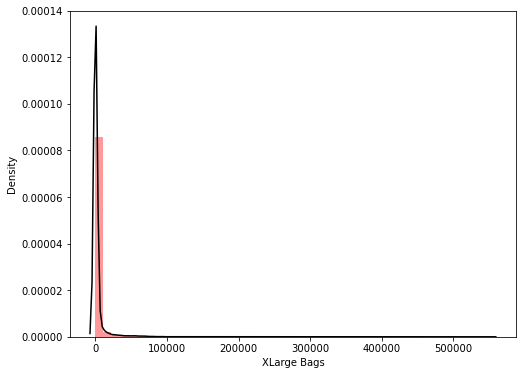

In [54]:
plt.figure(figsize=(8,6))
sns.distplot(df['XLarge Bags'],color='r', kde_kws={"color": "k"})
print('Minimum',df['XLarge Bags'].min())
print('Maximum',df['XLarge Bags'].max())

Xtra large bags are densely populated in the range 0 to 5000, whereas they are spread till values more than 5 lakh. Distribution of data is highly right skewed.

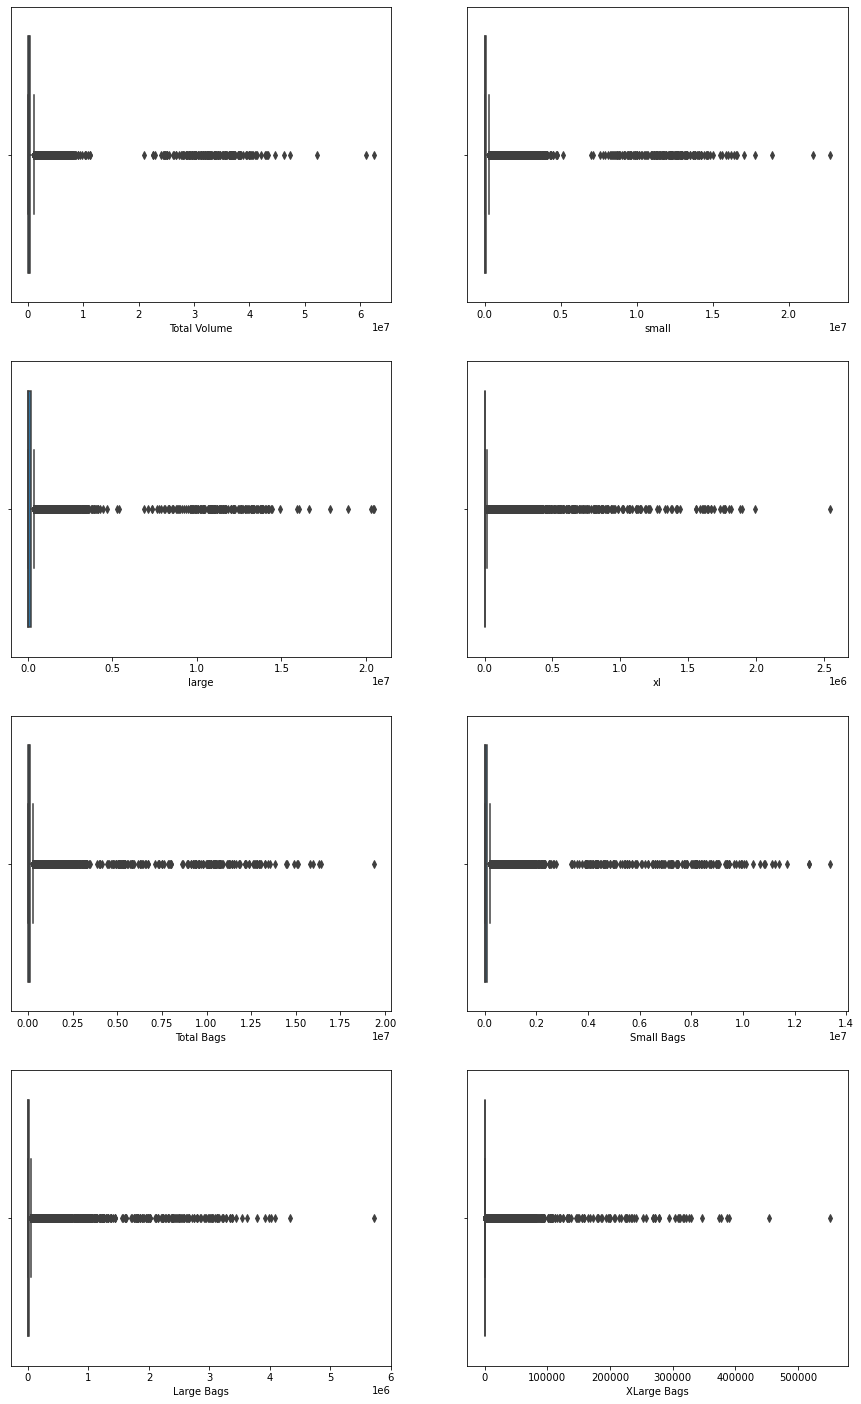

In [55]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(CF):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],ax=ax[r,c])
    c+=1

Here large number of outliers present in all the features that is needed to be removed.

# Now checking biavariate features

<AxesSubplot:xlabel='year', ylabel='region'>

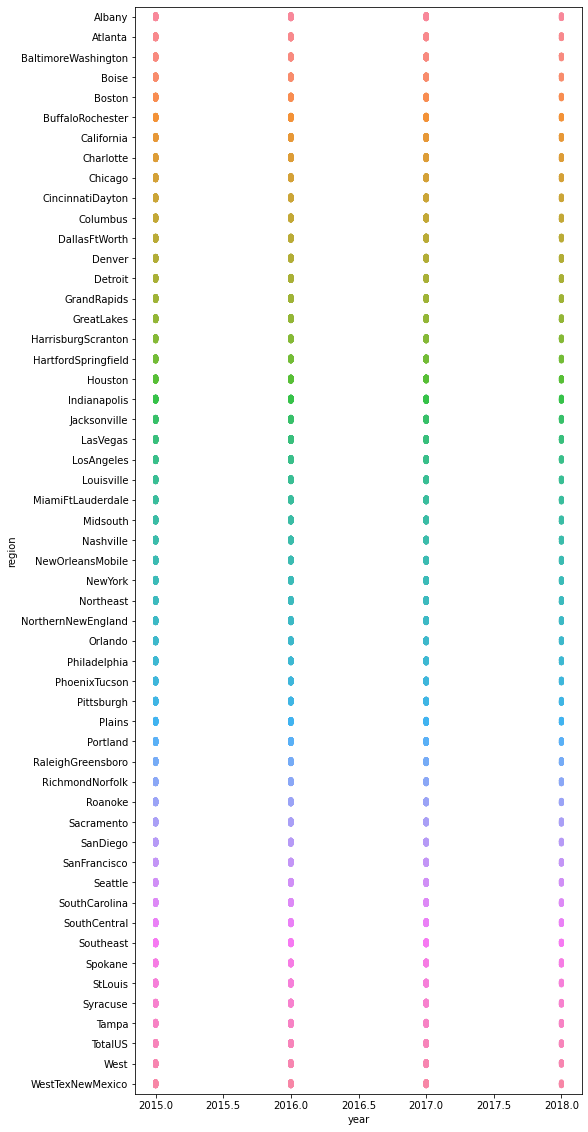

In [56]:
plt.figure(figsize=(8,20))
sns.stripplot(x='year',y='region',data=df)

Avocados are collected from all the regions irrespective of the year. For each year avocados are collected from all the same regions

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

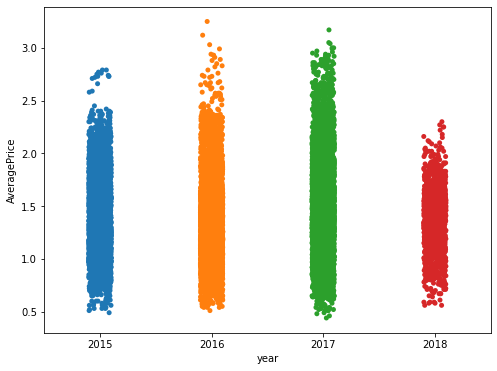

In [57]:
plt.figure(figsize=(8,6))
sns.stripplot(x='year',y='AveragePrice',data=df)

Average price is highest in the year 2016, but relatively price seem to increase as the time passes except for the year 2018 which is an exception.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

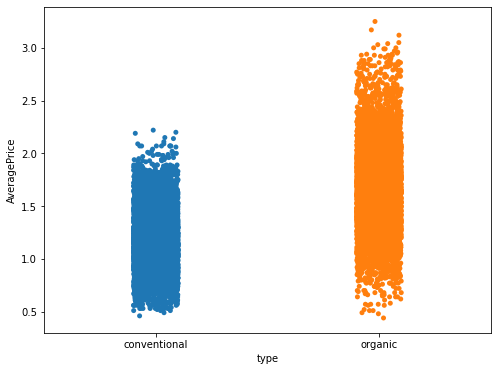

In [58]:
plt.figure(figsize=(8,6))
sns.stripplot(x='type',y='AveragePrice',data=df)

# organic Avacoados are more expensive than the conventional ones.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

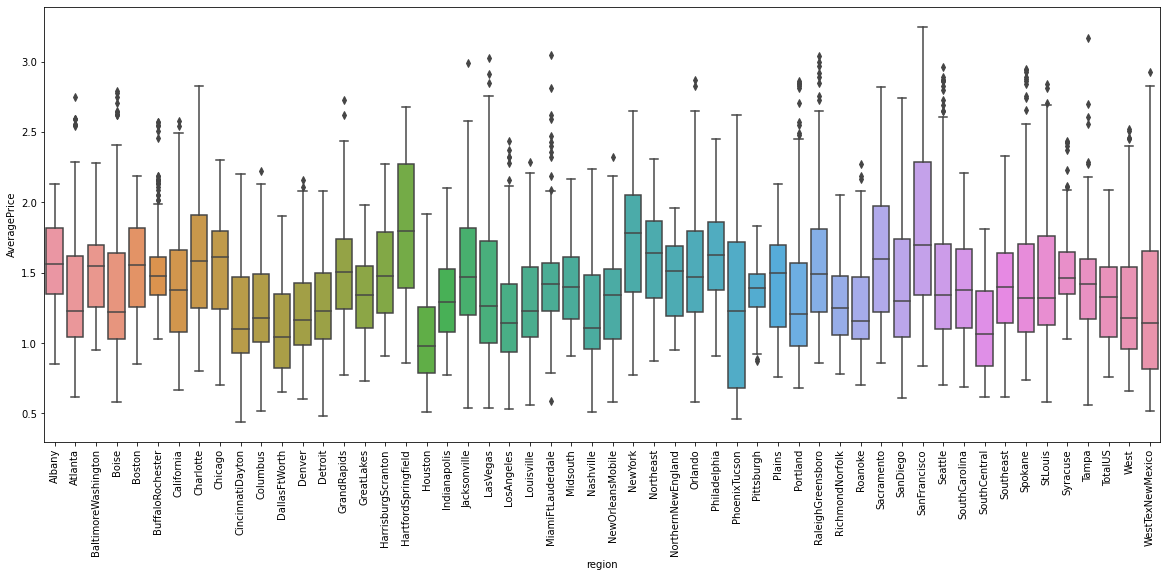

In [59]:
plt.figure(figsize=(20,8))
sns.boxplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)

Highest average price for avacaodo's were in San diego, Las vegas and cahrlotte regions while the least was from phoenix tucson. It is also to be noted that highest average price belong from areas where there is more development.

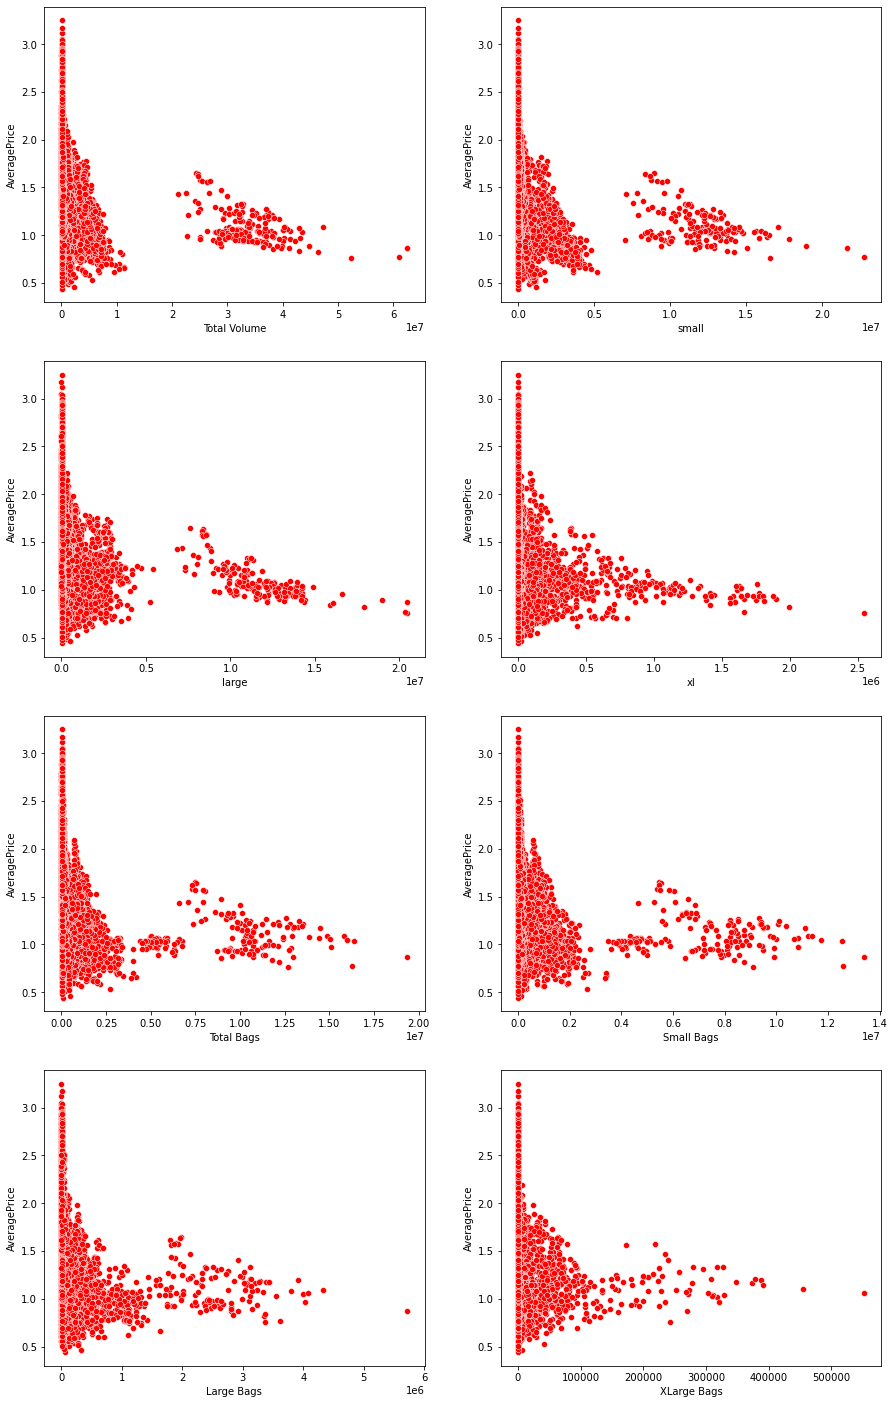

In [60]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(CF):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.scatterplot(x=n,y='AveragePrice',data=df,ax=ax[r,c],color='r')
    c+=1

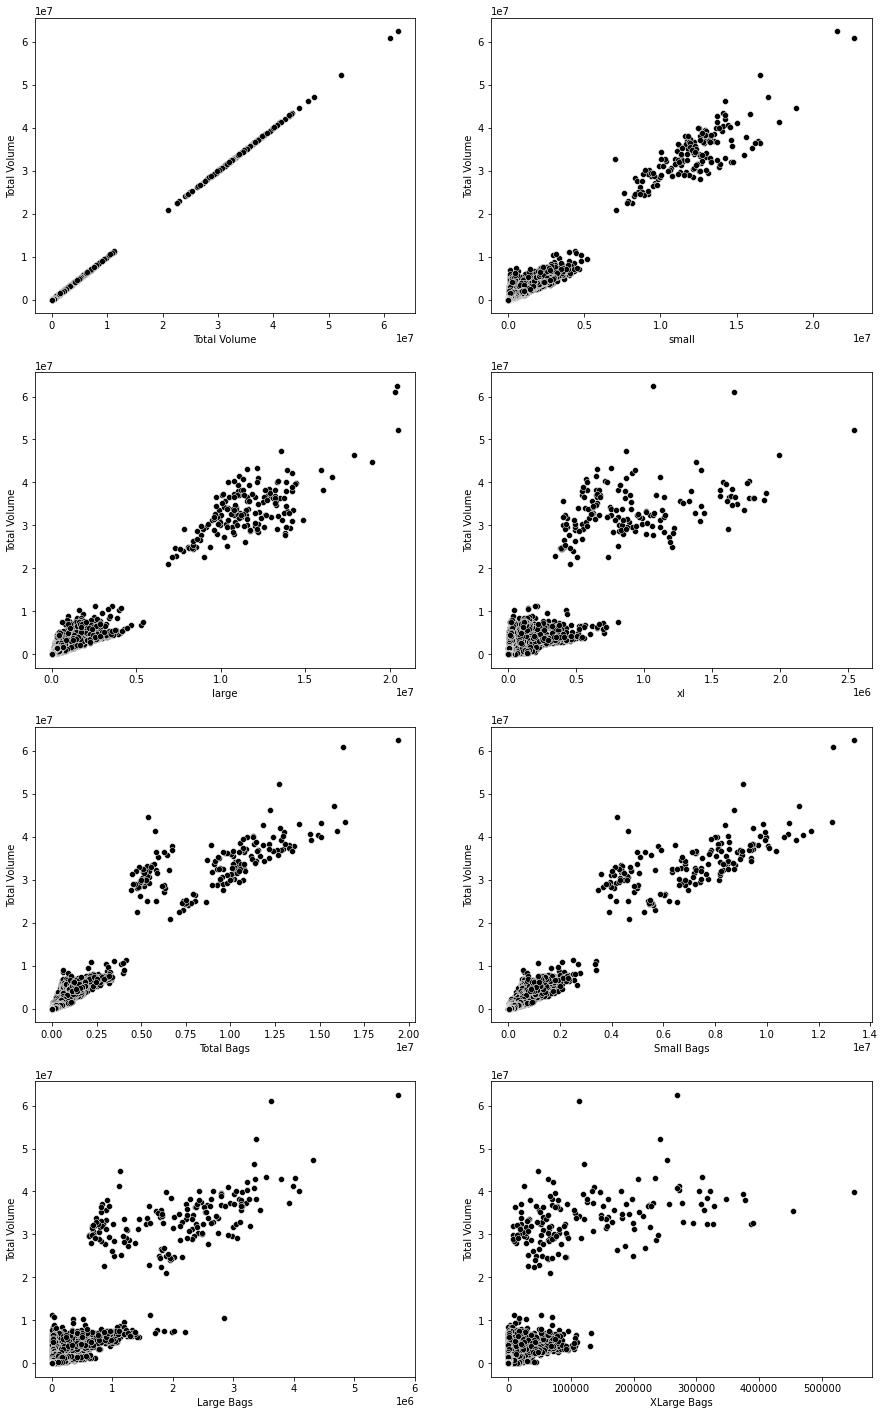

In [61]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(CF):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.scatterplot(x=n,y='Total Volume',data=df,ax=ax[r,c],color='k')
    c+=1

With the increase in total volumes of avacado, quatity of all types of bags as well as PLU's also increases. This is logical as if volume of avacado's increases, no. of bags needed to carry it and PLU's inreases.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

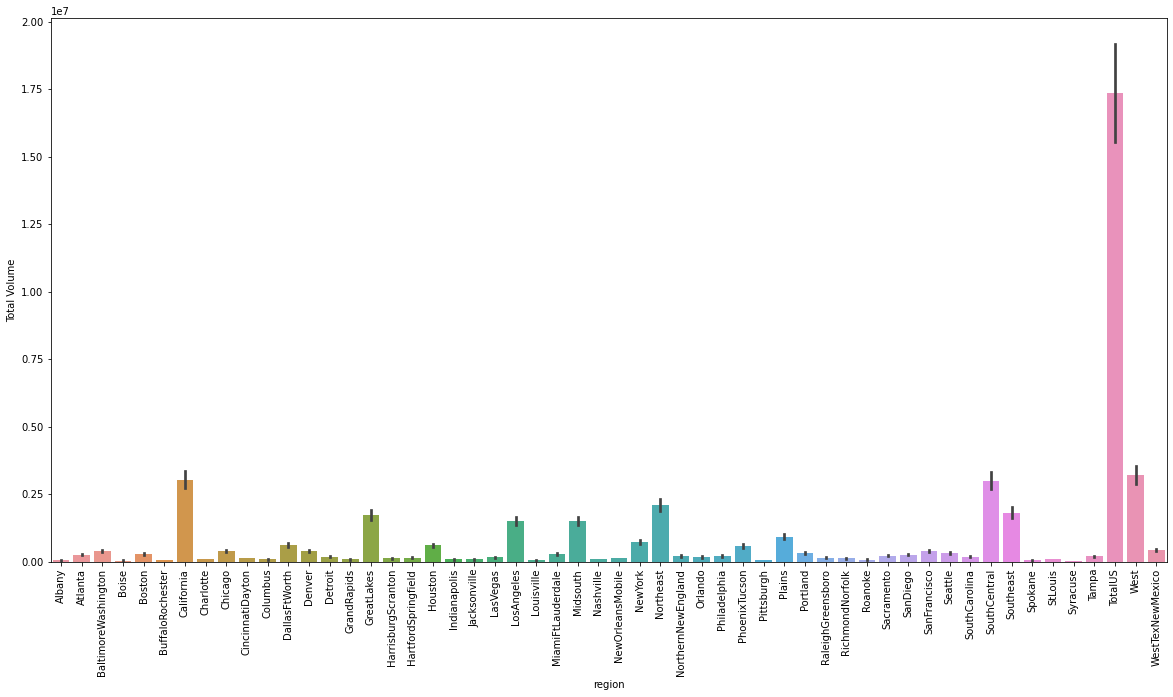

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)

Highest volumes of avacado's are found in the US. That could be the reason price of avacado's low there. As supply increases price decreases,whereas region with less volume such as las vegas have the highest price of avacado's.

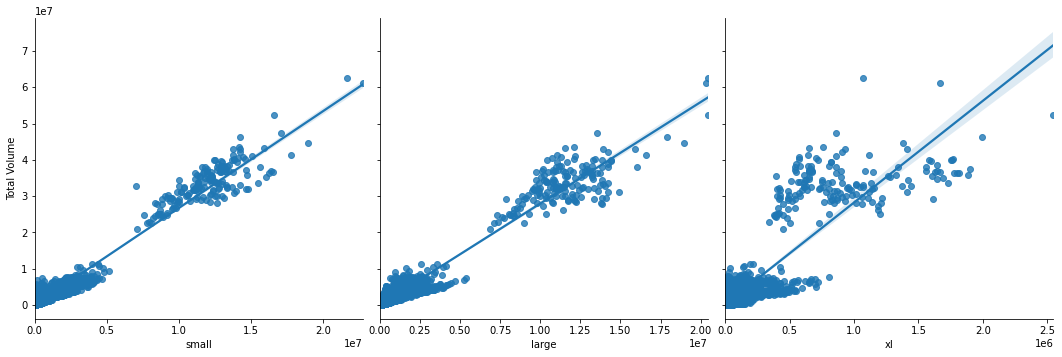

In [63]:
sns.pairplot(df, x_vars=['small', 'large', 'xl'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

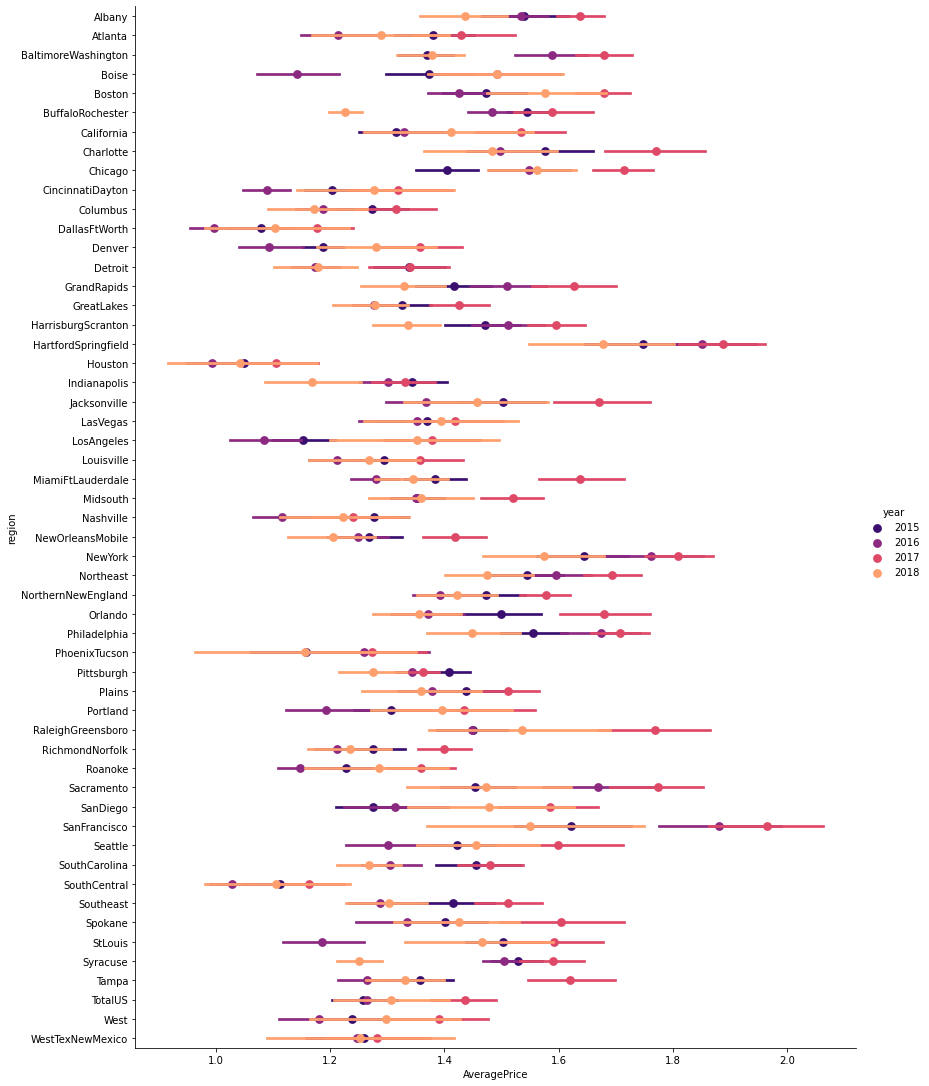

In [64]:
sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   aspect=0.8,
                   height=15,
                   palette='magma',
                   join=False)

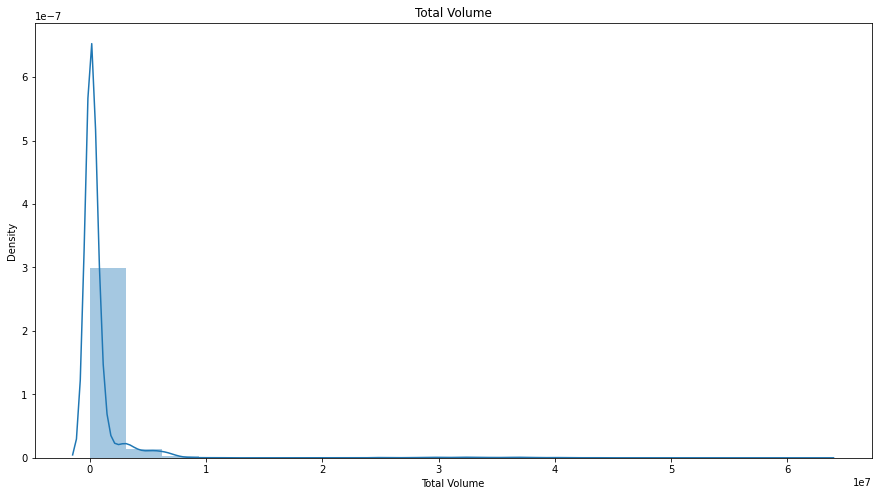

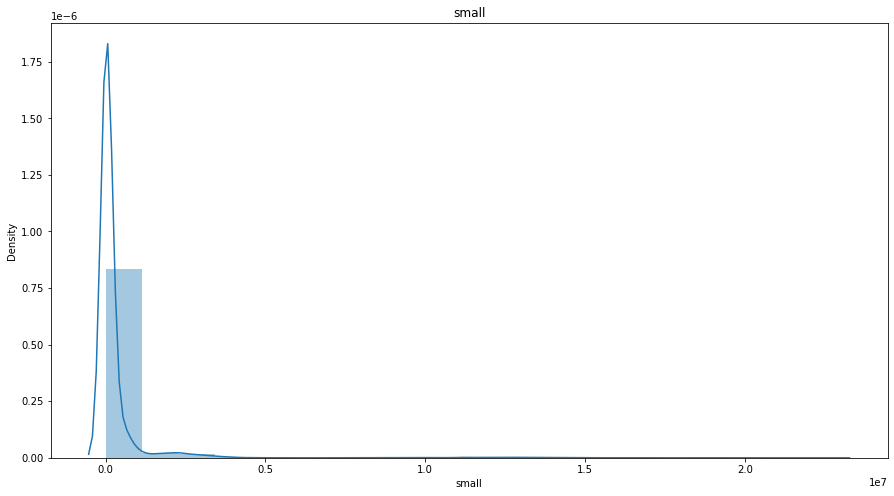

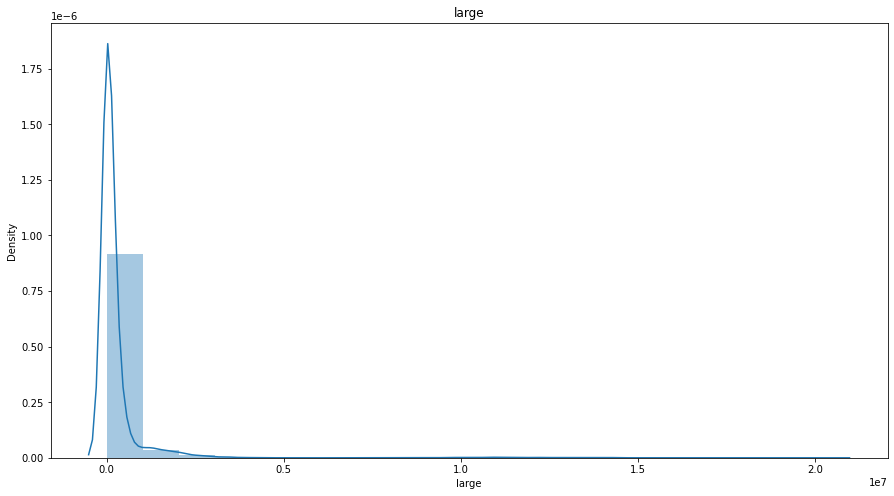

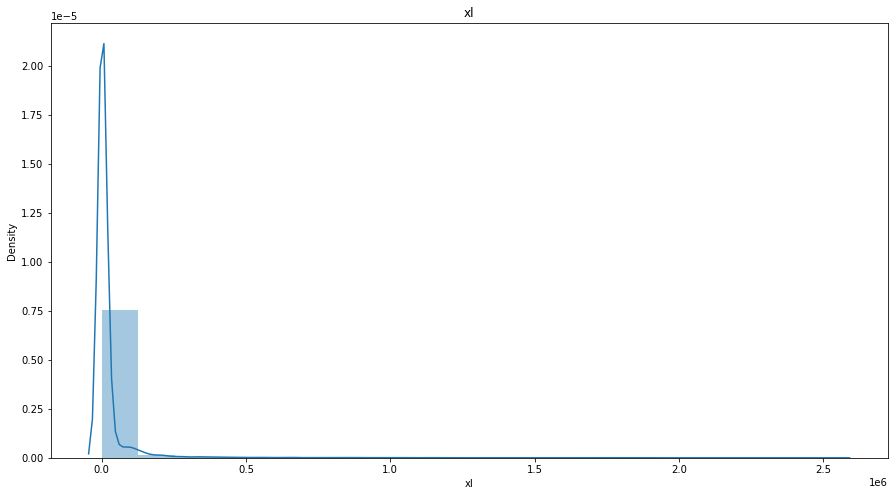

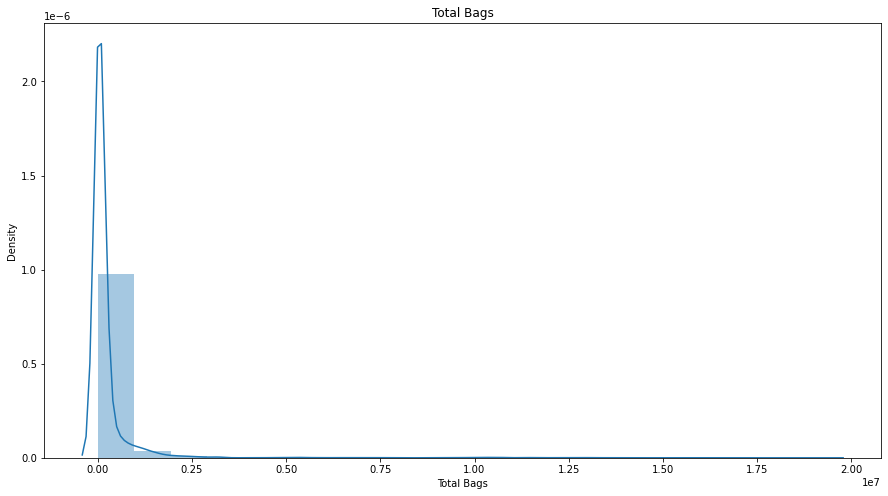

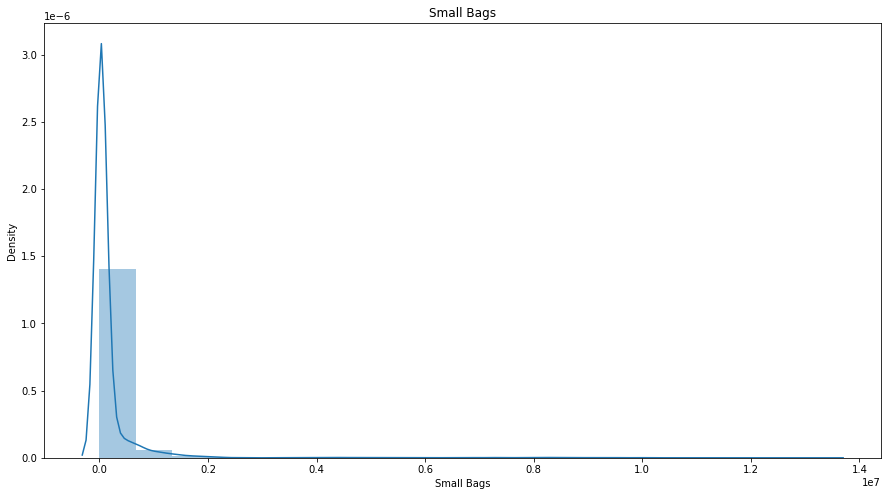

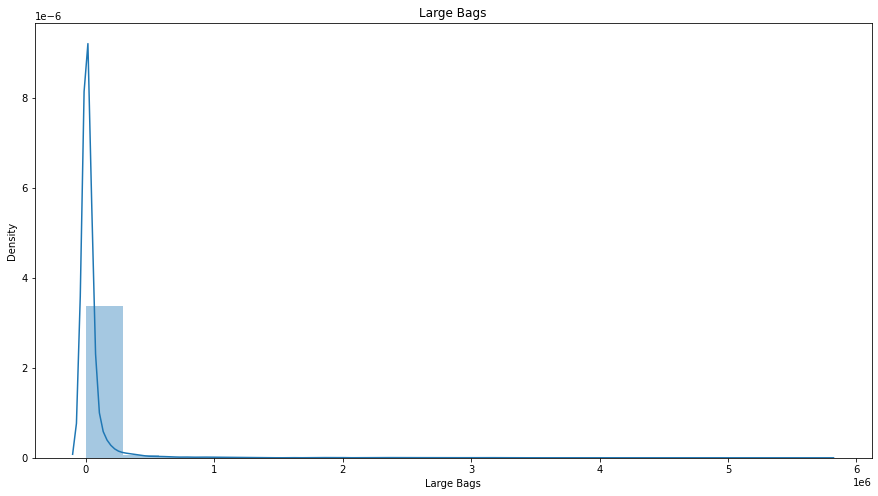

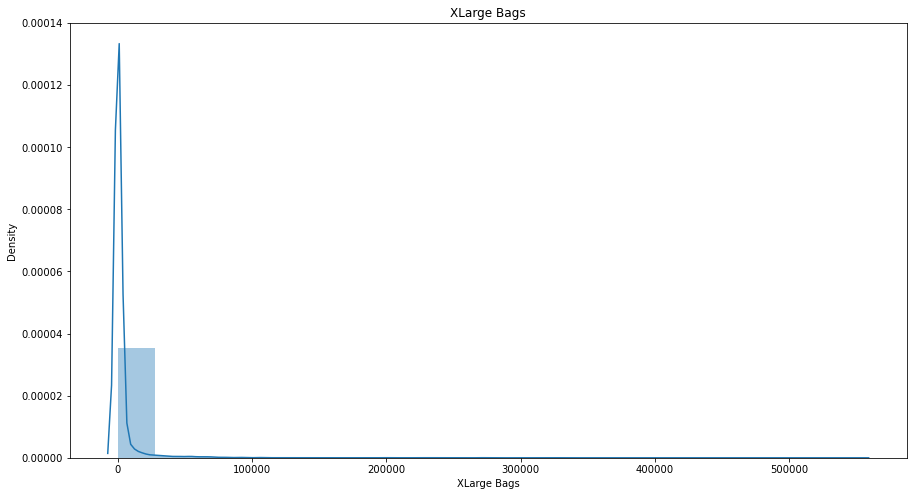

In [65]:
for i in df[CF]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 20)
    plt.title(i)
    plt.show()

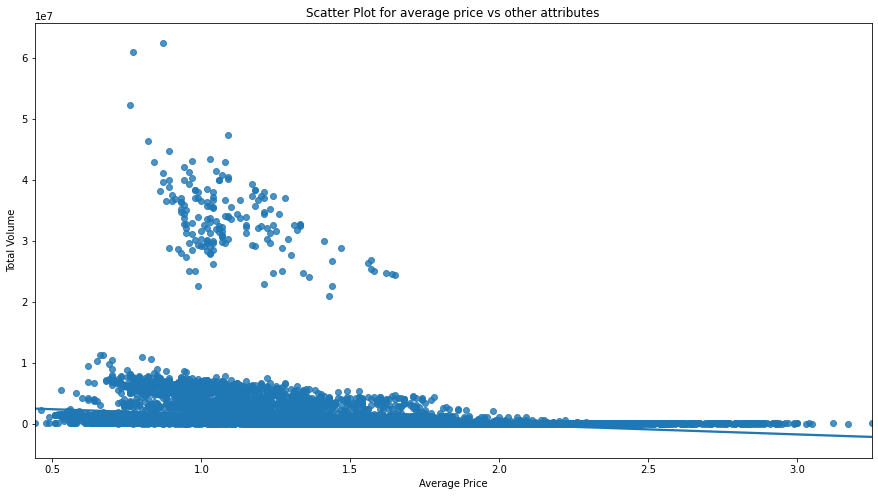

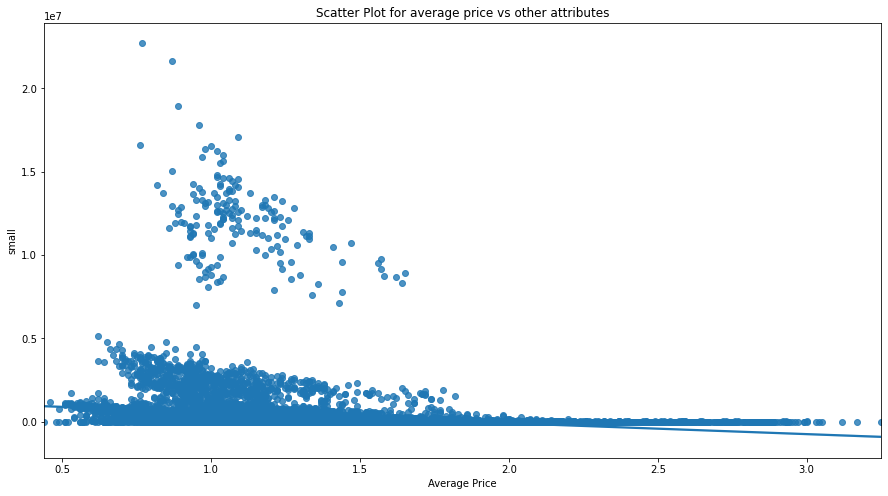

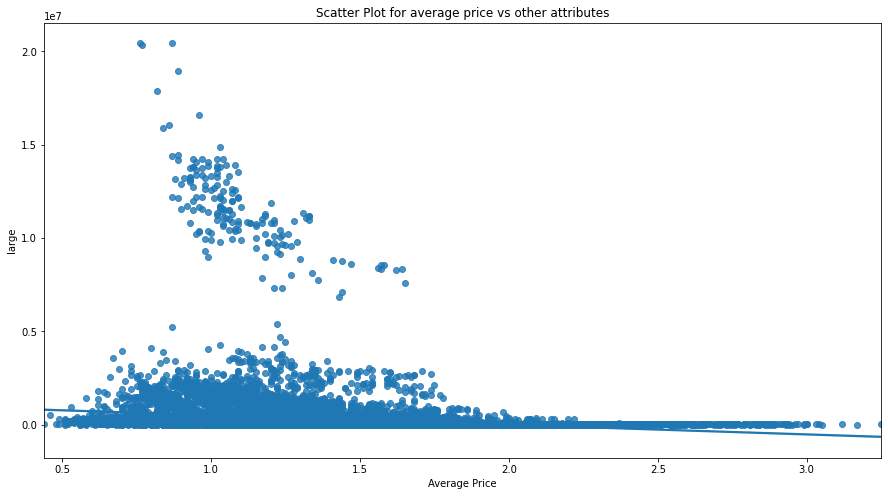

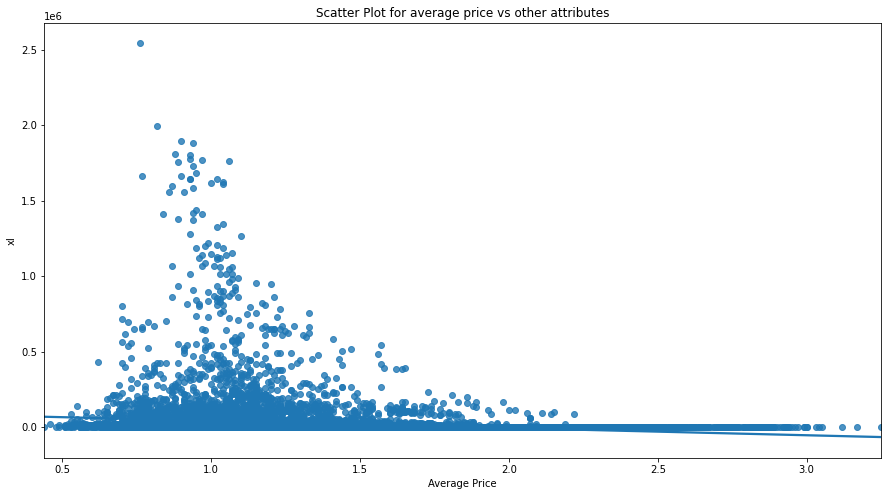

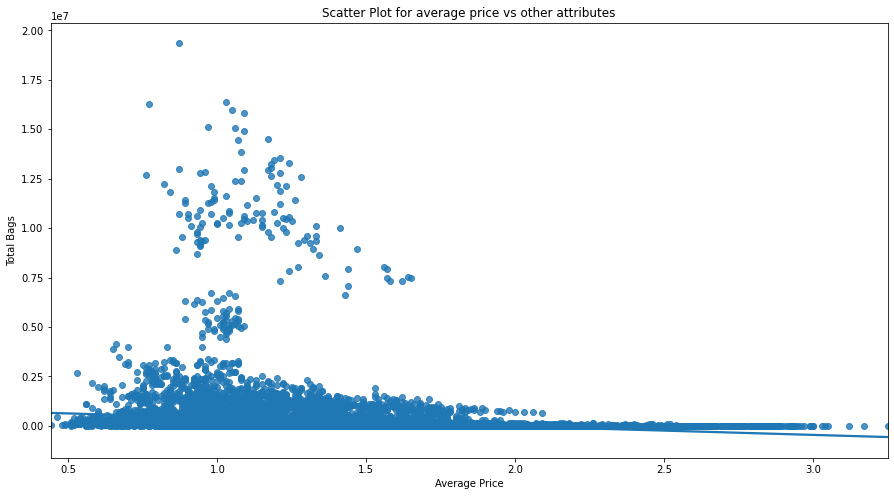

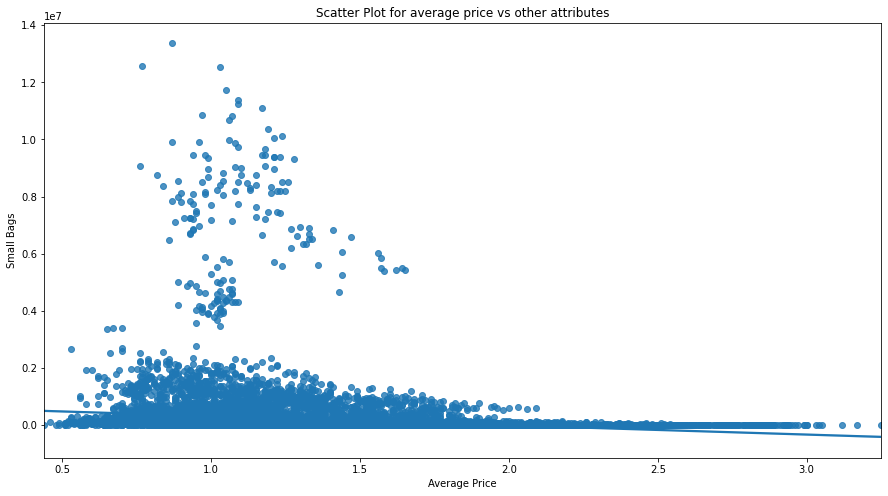

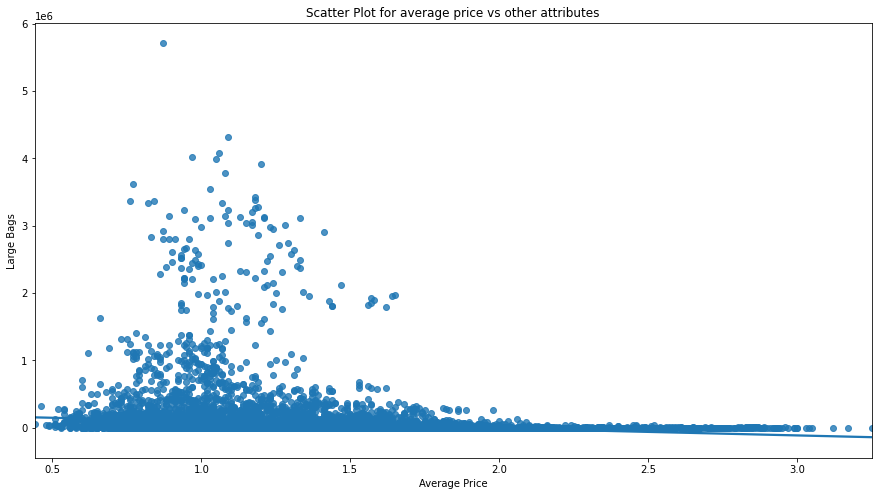

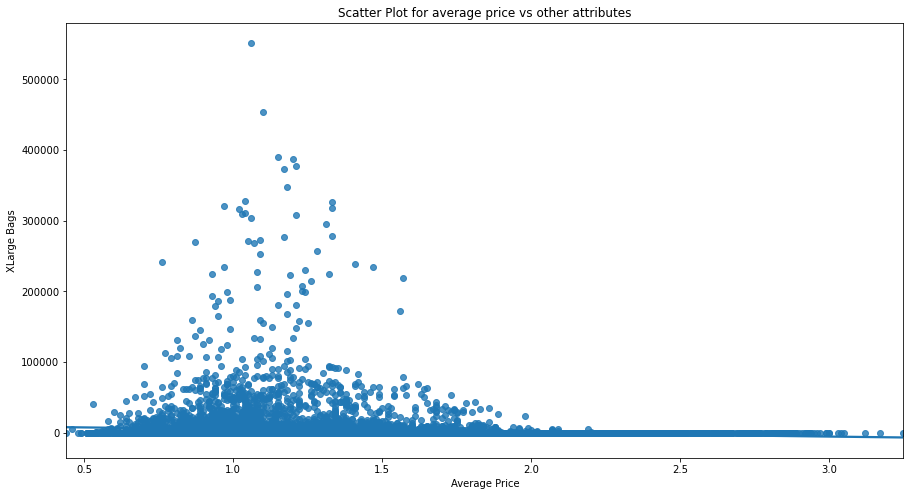

In [66]:
for i in CF:                                      #bivariate analysis
    plt.figure(figsize = (15, 8))
    sns.regplot(df['AveragePrice'], df[i])
    plt.title('Scatter Plot for average price vs other attributes')
    plt.xlabel('Average Price')
    plt.ylabel(i)  
    plt.show()

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

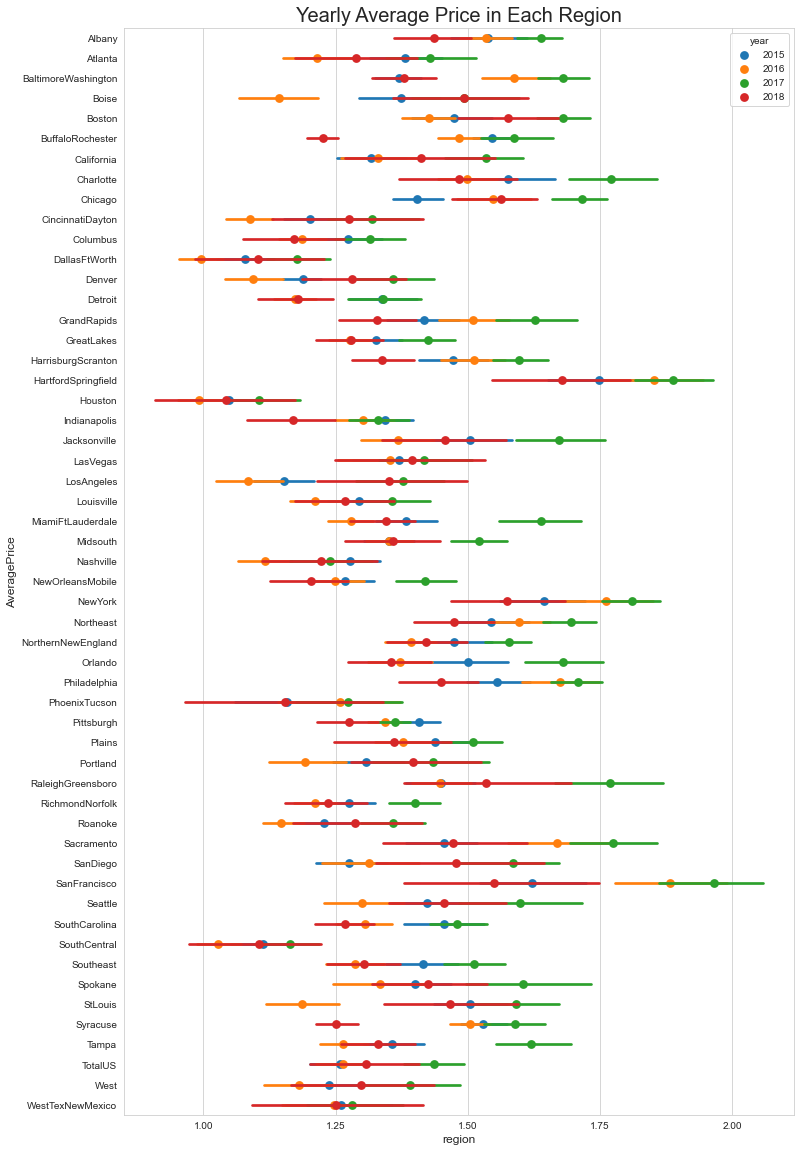

In [67]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

 from the above plot its clearly visible that year 2017 has highest average price compare to others and 2018 having lowest average price

In [68]:
df.drop('Date', axis = 1, inplace = True)
df.head()

AveragePrice  Total Volume    small      large      xl  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [69]:
cf = ['year', 'region', 'Month'] # categorical features

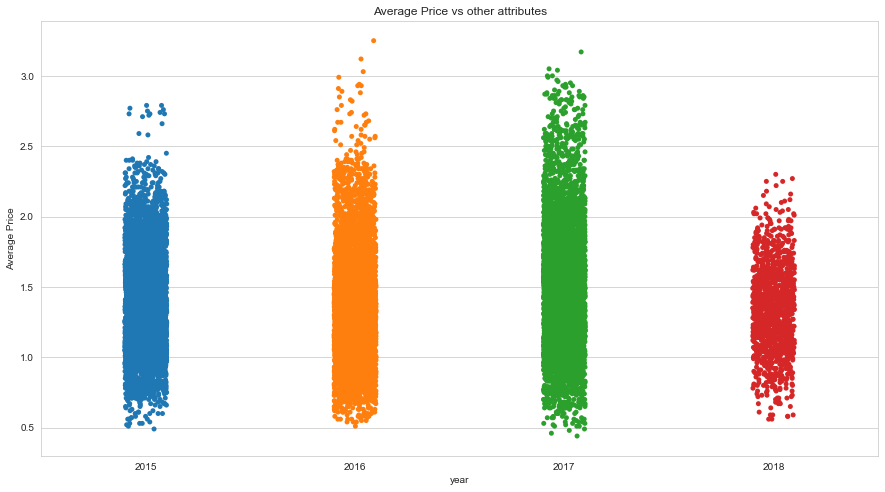

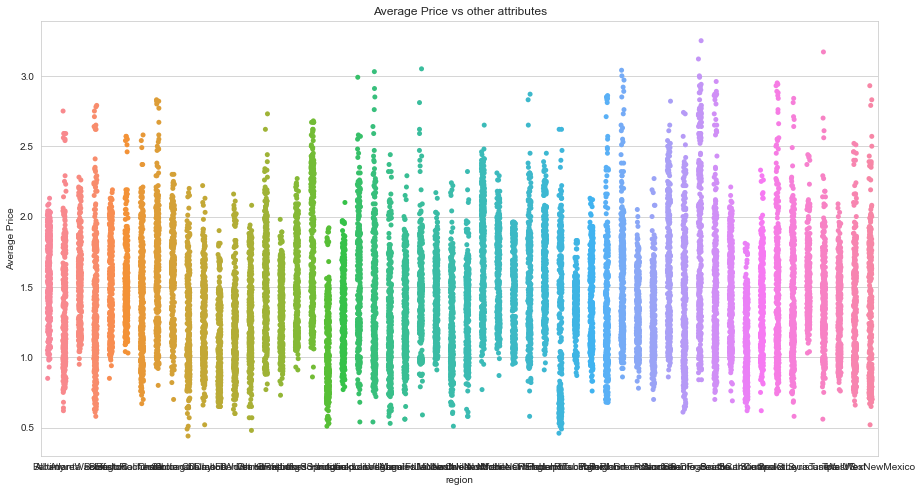

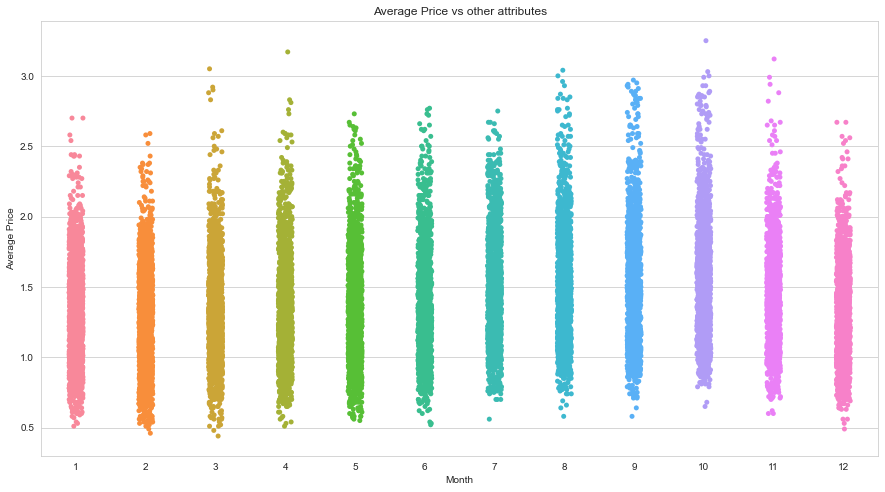

In [70]:
for i in cf:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df[i], df['AveragePrice'])
    ax.set(xlabel = i, ylabel = 'Average Price')
    plt.title('Average Price vs other attributes')
    plt.show()

Prices seems to be highest in the month of November and prices have high range in the month of December.

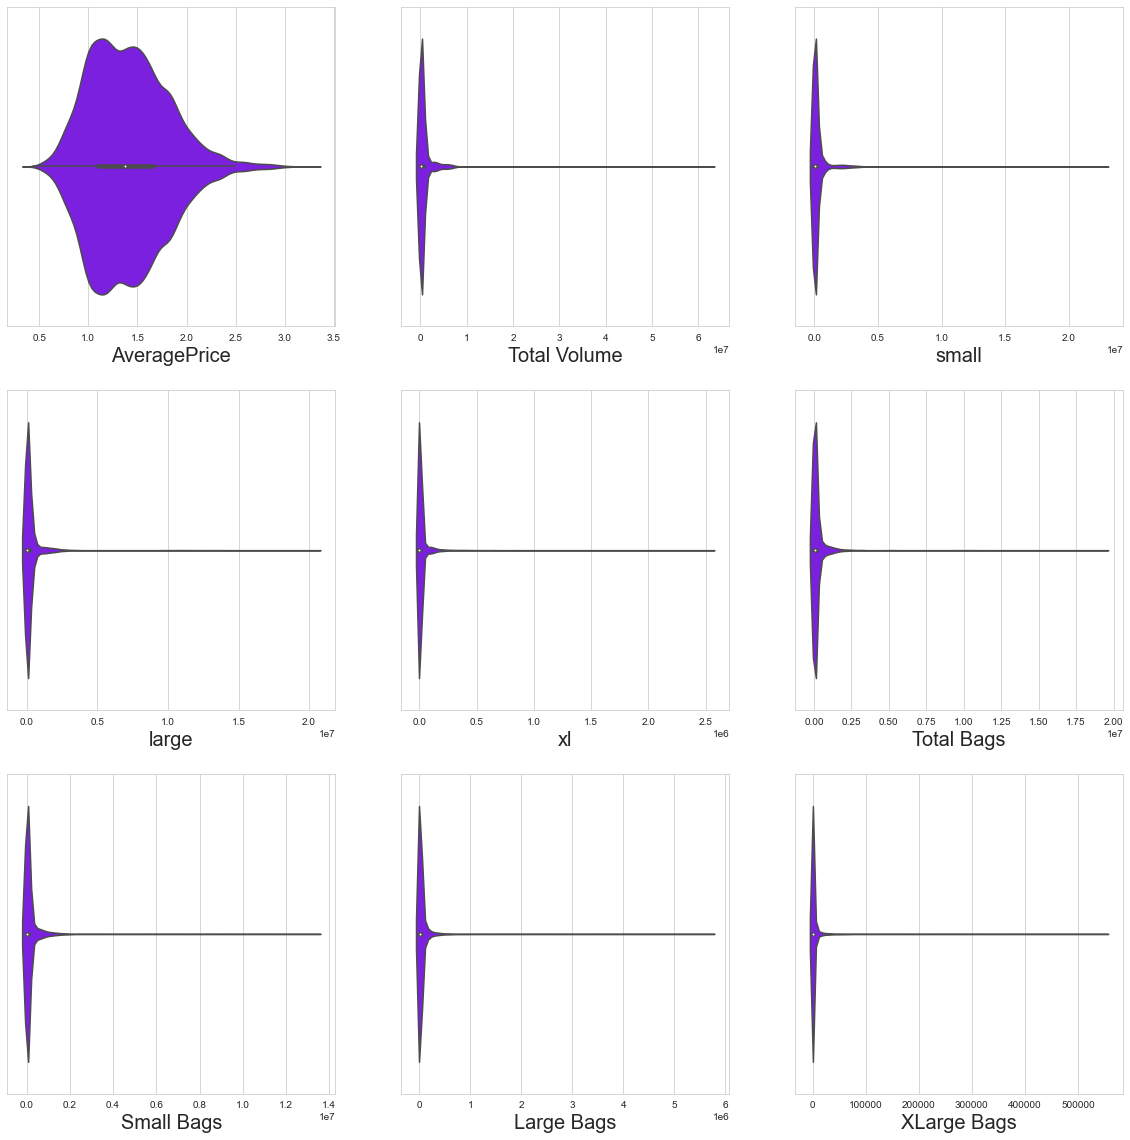

In [71]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

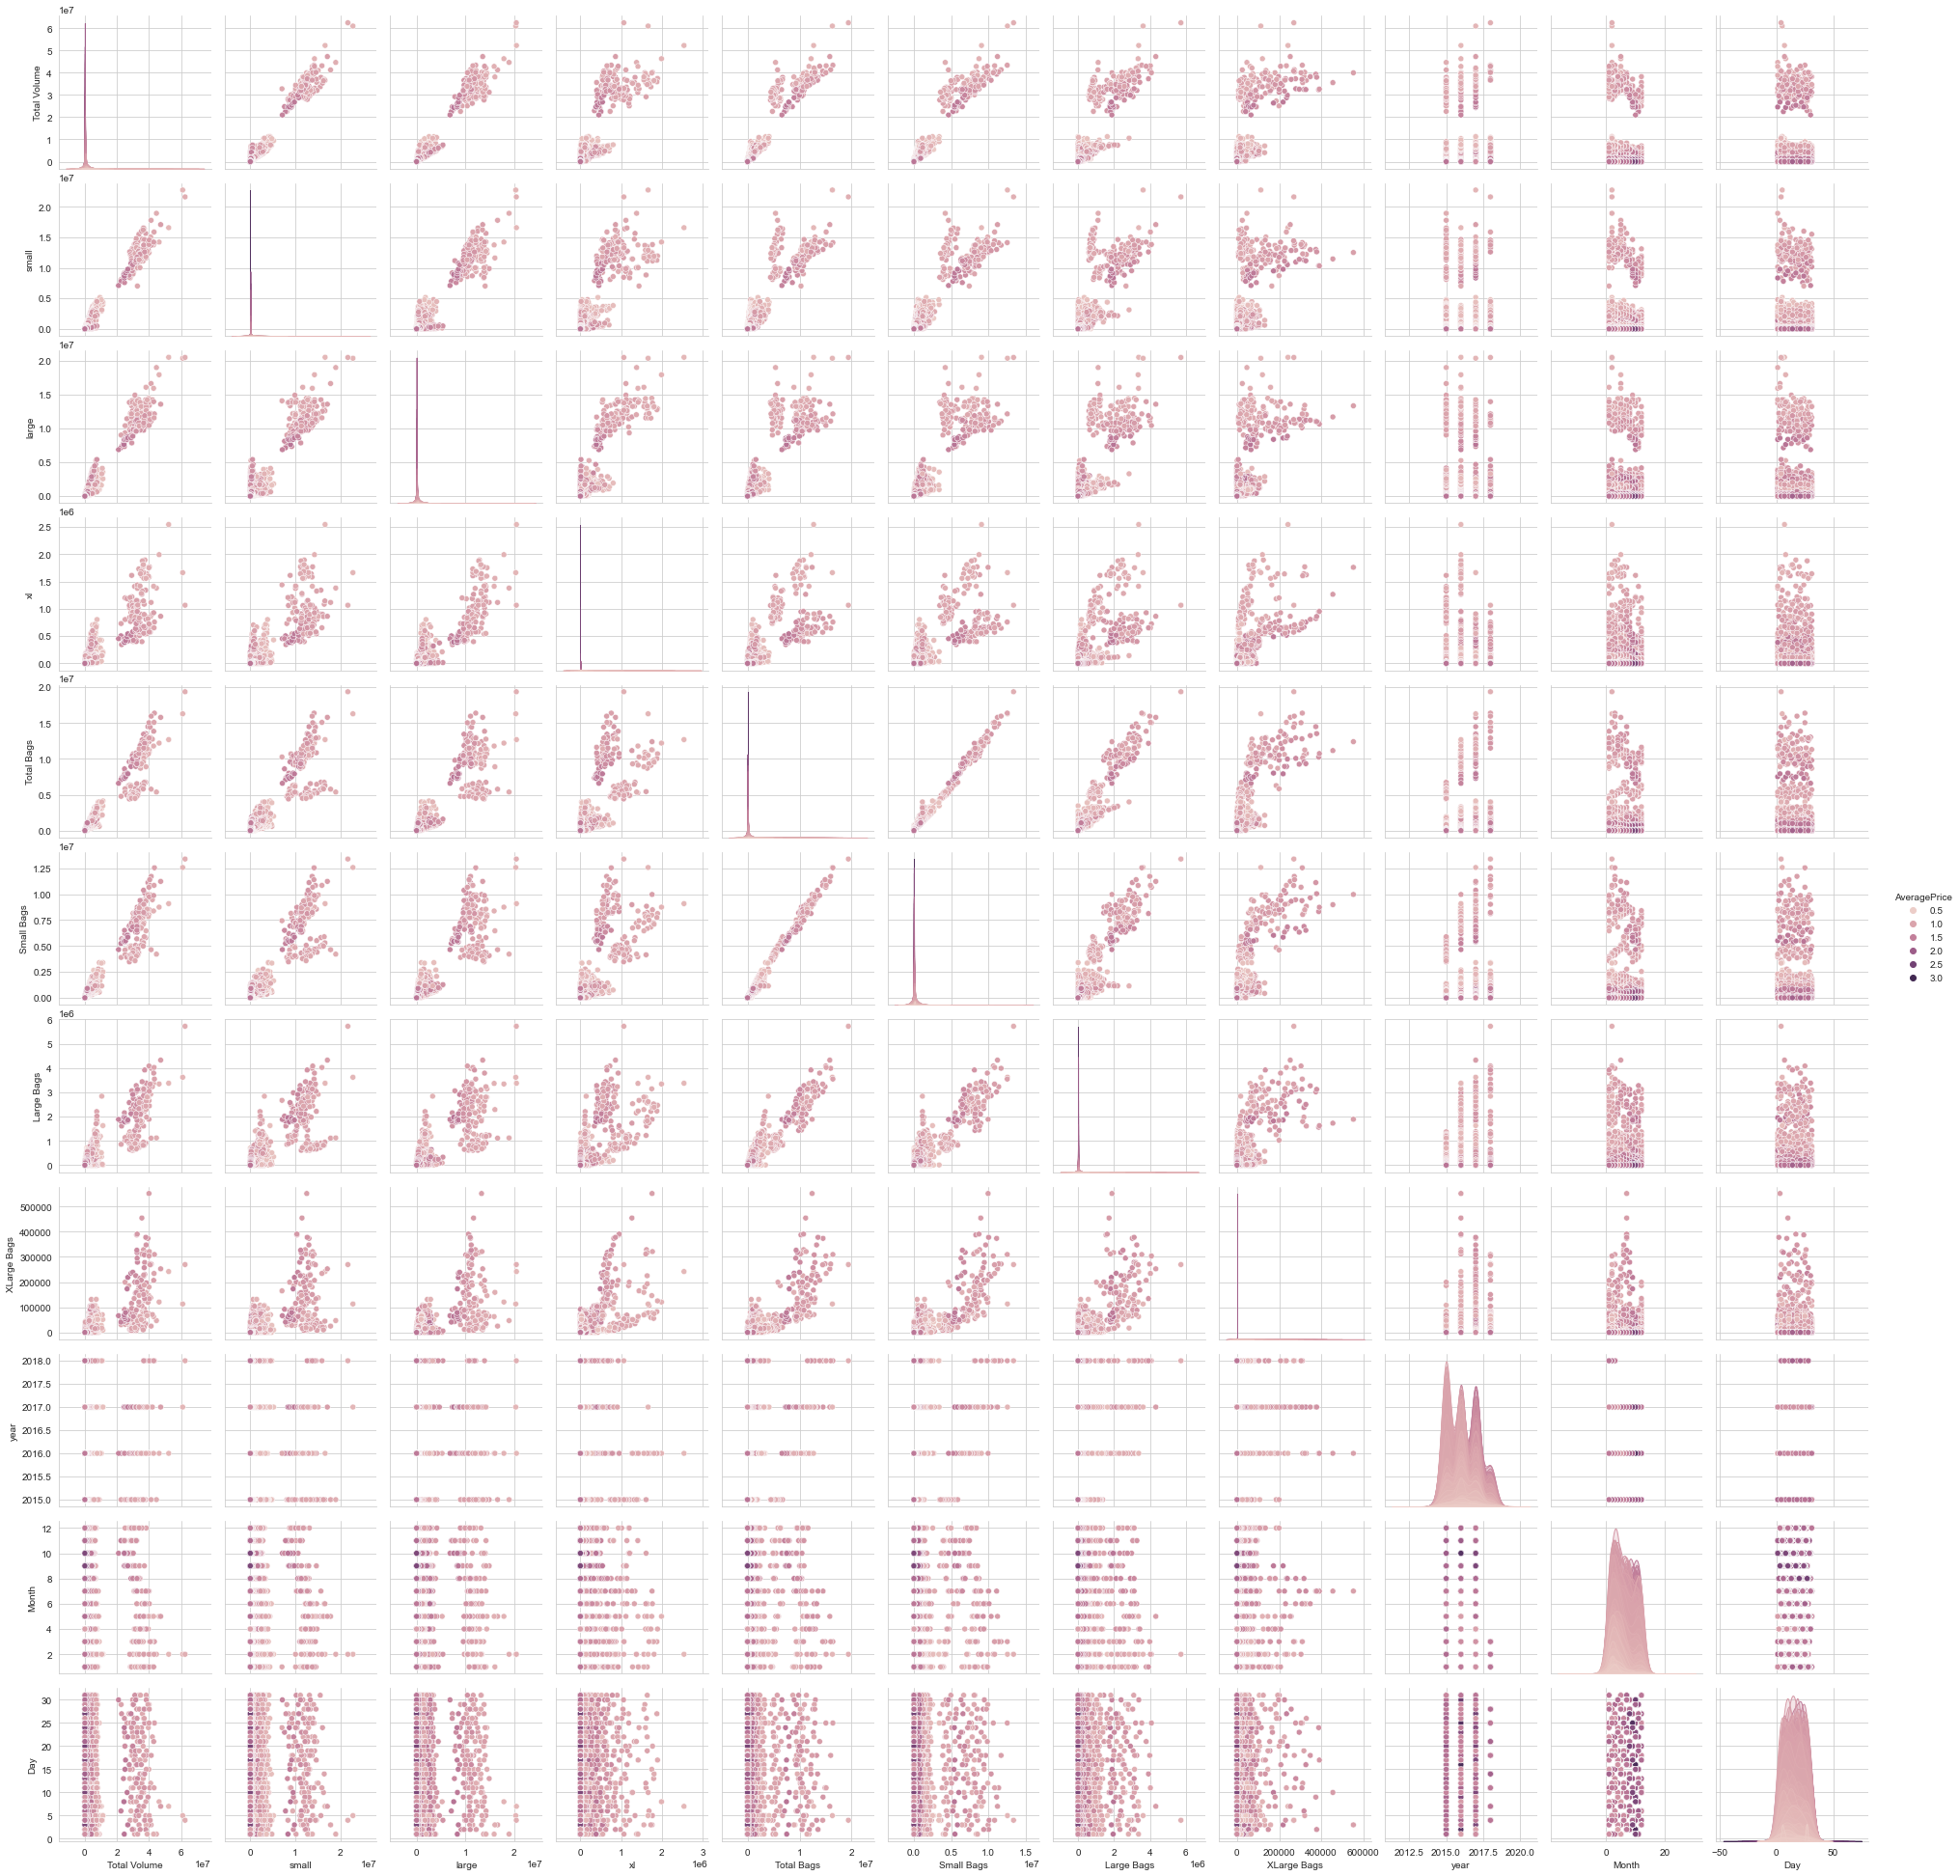

In [72]:
#pair ploting for df
sns.pairplot(df,hue="AveragePrice")

Most of the pair plots are linear and also there are some outliers in some of the features.Lets have a look into that.

# Now will check the correlation of various features in the given dataset

In [73]:
df.corr()

AveragePrice  Total Volume     small     large        xl  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
small            -0.208317      0.977863  1.000000  0.926110  0.833389   
large            -0.172928      0.974181  0.926110  1.000000  0.887855   
xl               -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
Day               0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197   
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193   
small           0.920057    0.925280    0.838645     0.699377  0.003353   
large           0.905787    0.916031    0.810015     0.688809 -0.009559   
xl              0.792314    0.802733    0.698471     0.679861 -0.036531   
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552   
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915   
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891   
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033   
year            0.071552    0.063915    0.087891     0.081033  1.000000   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.177050   
Day            -0.004988   -0.003870   -0.008352     0.000319  0.004475   

                 Month       Day  
AveragePrice  0.162409  0.027386  
Total Volume -0.024689 -0.009747  
small        -0.025803 -0.010159  
large        -0.022108 -0.012393  
xl           -0.033424 -0.009009  
Total Bags   -0.022724 -0.004988  
Small Bags   -0.023126 -0.003870  
Large Bags   -0.020187 -0.008352  
XLarge Bags  -0.012969  0.000319  
year         -0.177050  0.004475  
Month         1.000000  0.010621  
Day           0.010621  1.000000

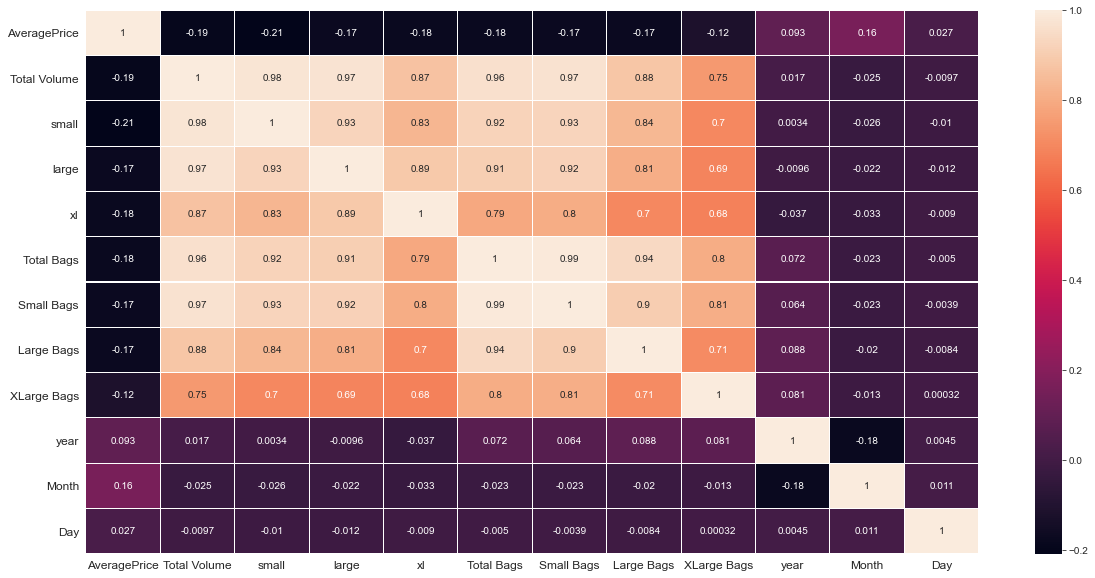

In [74]:
                            #multivariate analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=.1,annot=True)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(rotation=0,fontsize=12);

By looks into the heat map these are my observations on independent features.

- Total Bags and Small Bags are highly correlated with each other.
- Total Volume and Small Bags are highly correlated with each other.
- Total Volume and Total Bags are highly correlated with each other.
- Total Volume and 4225 are highly correlated with each other.
- I can see negative correlation but not more than -0.8 so let it be.
- To get better insight on target correlation let me plot bar plot.

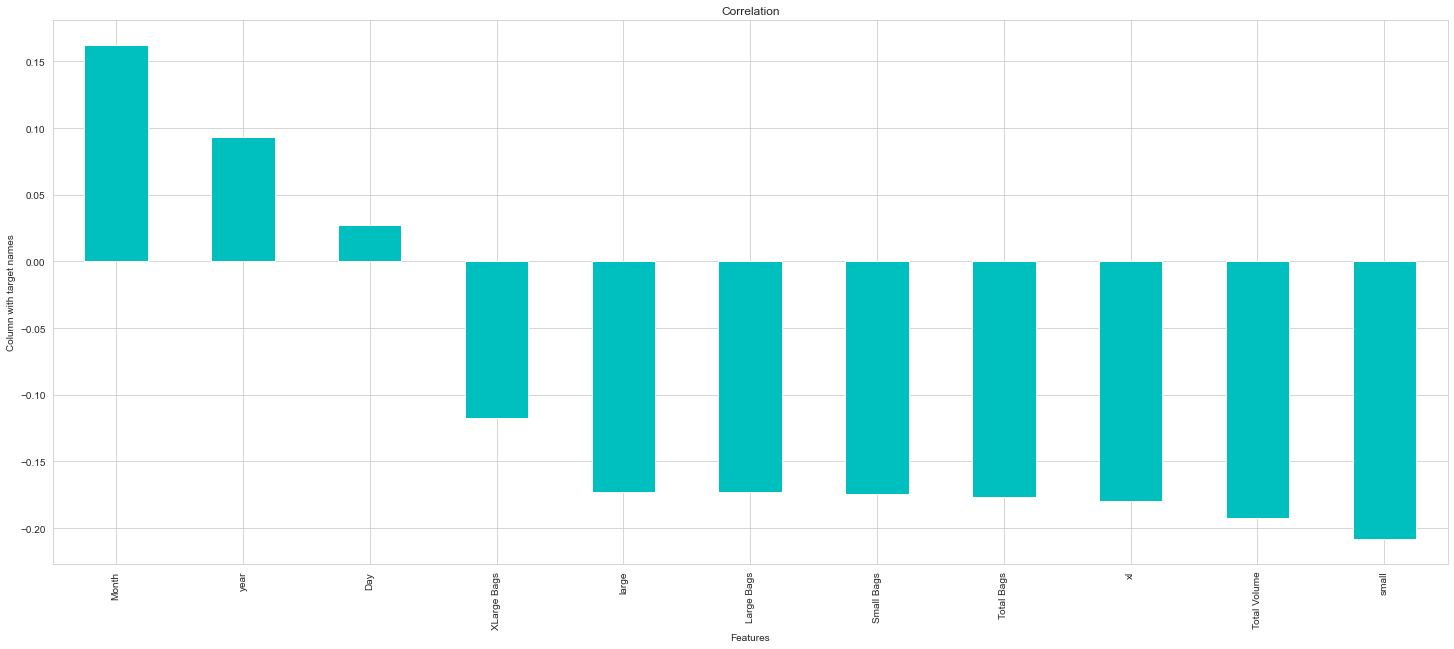

In [75]:
plt.figure(figsize = (25, 10))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

There is very high correlation among Total Volume, X-large bags, large bags, small bags,total bags, small, large, xl

# Now will do the Data Cleaning


## 1. Checking  Outliers 

<AxesSubplot:>

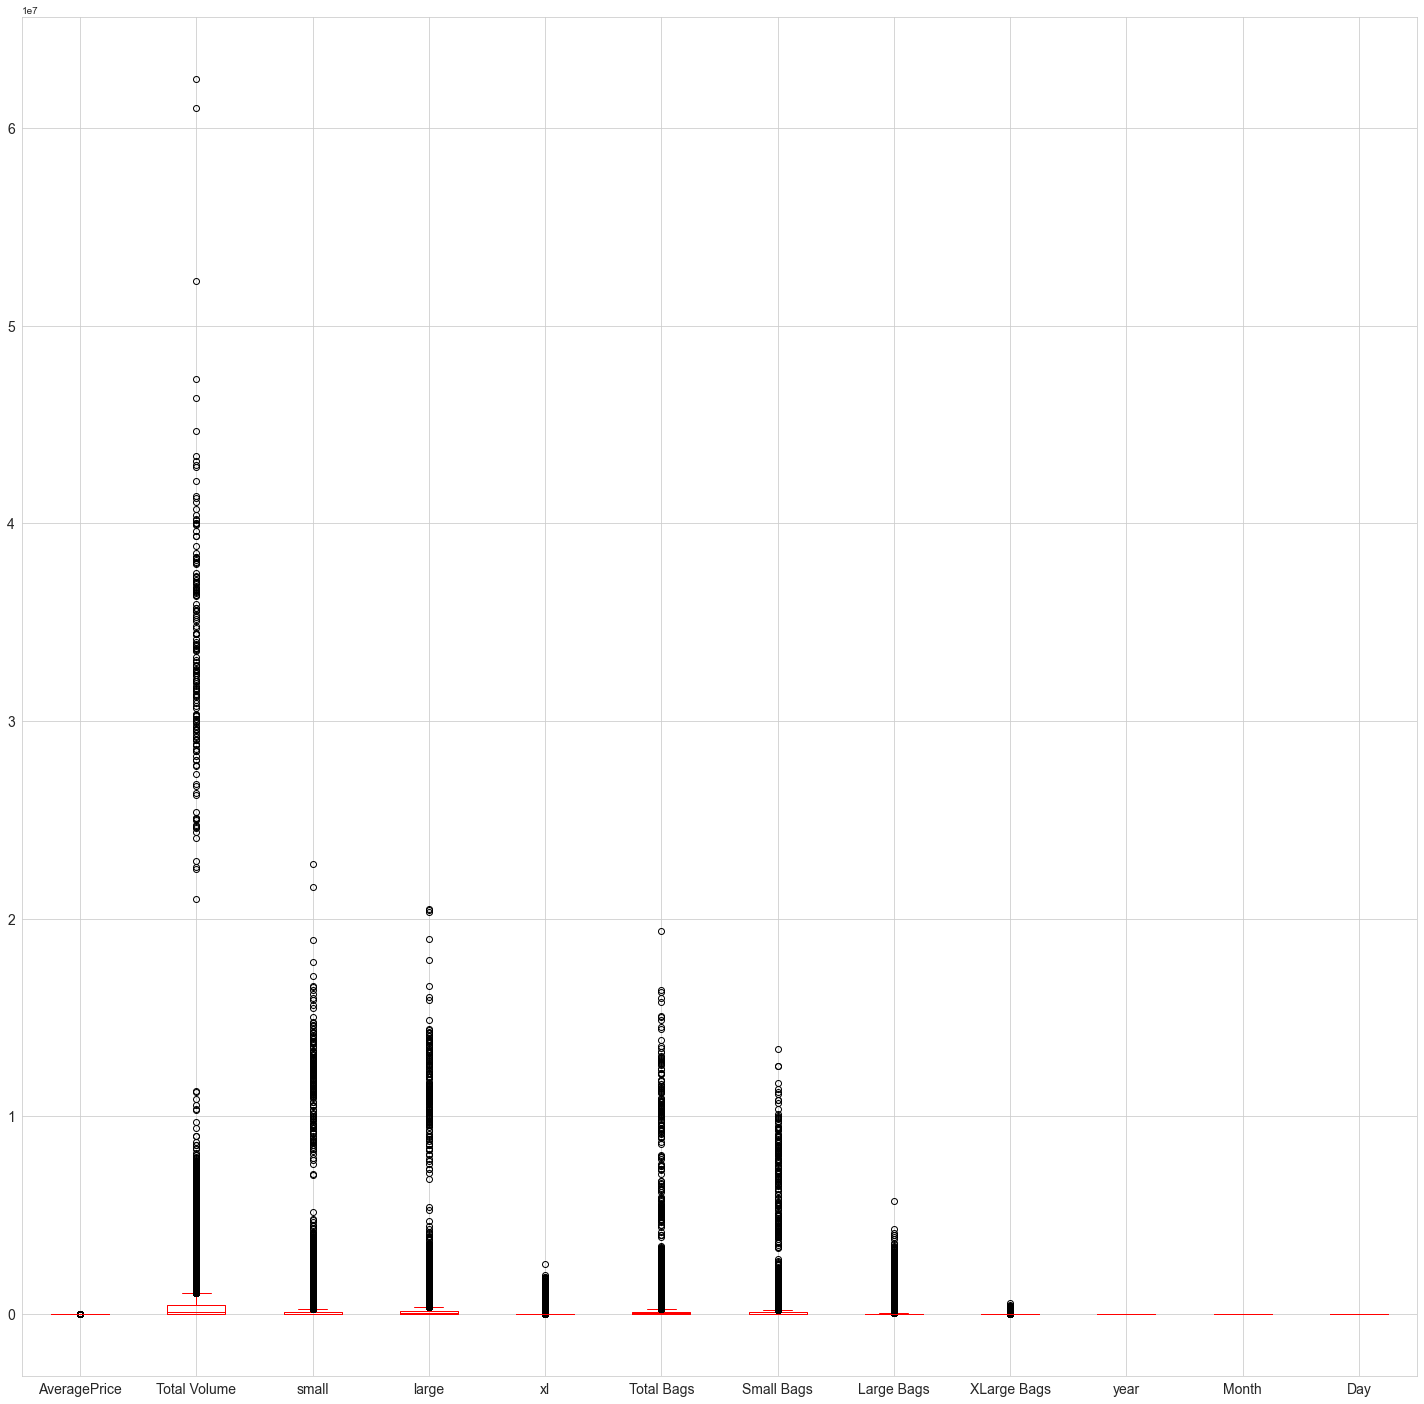

In [76]:
df.plot(kind='box',fontsize=14,figsize=(25,25),color='r')

- In all the columns except year, month and day there are outliers.And these year,month,day are somehow categorical no need to check outliers for these columns.

- And in all other columns i can see a huge number of outliers i have to treat them.

- In my target column i have outliers but i'll not treat them as i don't want to manipulate my target column.

In [77]:
# converting categorical features of text data into model-understandable numerical data
label_cols = ['type','region']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df[label_cols] = df[label_cols].apply(lambda x : label.fit_transform(x))

In [78]:
#Features having outliers and skewness
features=df[['Total Volume','small','large','xl','Total Bags','Small Bags','Large Bags','XLarge Bags']]

## Method 1: Now Using Z Score for removing Outliers

In [79]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

AveragePrice  Total Volume    small      large      xl  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0         8603.62       93.25          0.0     0  2015       0     12   27  
1         9408.07       97.49          0.0     0  2015       0     12   20  
2         8042.21      103.14          0.0     0  2015       0     12   13  
3         5677.40      133.76          0.0     0  2015       0     12    6  
4         5986.26      197.69          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7  

[17782 rows x 14 columns]

In [80]:
#Checking shape of new dataset
df_new.shape

(17782, 14)

In my new dataset i have 17782 rows and 14 columns

In [81]:
#Checking shape of old dataset
df.shape

(18249, 14)

In my old dataset i was having 18249 rows and 14 columns.

In [82]:
#Checking dataloss
Dataloss = (((18249-17782)/18249)*100)
Dataloss

2.55904433119623

Using Zscore i have 2.56% data loss.Which is less than 10%.But still let me have a look into IQR method also.

In [83]:
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
small           4.928850
large           4.472729
xl              5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
Month           0.098217
Day             0.011251
dtype: float64

we can notice skewness is present in almost all columns except year, month and Day.

In [84]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')




In [85]:
df

AveragePrice  Total Volume    small      large      xl  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0         8603.62       93.25          0.0     0  2015       0     12   27  
1         9408.07       97.49          0.0     0  2015       0     12   20  
2         8042.21      103.14          0.0     0  2015       0     12   13  
3         5677.40      133.76          0.0     0  2015       0     12    6  
4         5986.26      197.69          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7  

[18249 rows x 14 columns]

In [86]:
skew=('Total Volume','small','large','xl','Total Bags','Small Bags','Large Bags','XLarge Bags')

for col in skew:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [87]:
#Droping Day and region column
df =df.drop(["Day"],axis=1)

In [88]:
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.039041
small          -0.408827
large          -0.595360
xl              0.079074
Total Bags     -0.394347
Small Bags     -0.782875
Large Bags     -0.603830
XLarge Bags     1.225926
type           -0.052210
year            0.220792
region          0.005773
Month           0.098217
Day             0.011251
dtype: float64

# Data Pre Processing

In [89]:
x = df_new.drop("AveragePrice",axis=1)
y = df_new["AveragePrice"]

Assigned y as target variable and x as remaining features.

## Now Scaling the data using Standard Scaler Method

In [90]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [91]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

## Now using VIF function will remove the multi colinearity:

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features      Features
0      38.417482  Total Volume
1       5.707093         small
2       7.892867         large
3       3.955353            xl
4      21.432955    Total Bags
5       9.445821    Small Bags
6       2.658963    Large Bags
7       1.889459   XLarge Bags
8       3.485649          type
9       1.392921          year
10      1.078573        region
11      1.053382         Month
12      1.000678           Day

Since we are able to see that high VIF  value for Total volume , so first let me ,drop that column and check VIF again.`

In [93]:
#Droping Total Volume column
X = X.drop(["Total Volume"],axis=1)

In [94]:

vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features     Features
0       3.288884        small
1       3.553283        large
2       3.953358           xl
3      14.508044   Total Bags
4       9.400018   Small Bags
5       2.641675   Large Bags
6       1.880889  XLarge Bags
7       3.383749         type
8       1.369874         year
9       1.076453       region
10      1.049041        Month
11      1.000594          Day

Even after removing Total volume i can see high VIF for Total bags so let me drop it.

In [95]:
#Droping Total Bags column
X = X.drop(["Total Bags"],axis=1)

In [96]:

vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features     Features
0       3.238947        small
1       3.410162        large
2       3.951769           xl
3       3.087044   Small Bags
4       1.723182   Large Bags
5       1.879505  XLarge Bags
6       3.382487         type
7       1.345033         year
8       1.076089       region
9       1.048370        Month
10      1.000466          Day

- Now the multicolinearity has removed from the dataset. So, we will proceed further for machine learning model building

## Now we will build the Machine Learning Model

### 1. we will find the  Best Random State and Accuracy of dataset 

In [97]:
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = KNN()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7965046262653781  on Random_state  49


from the above inference we got the best accuracy of 79.65 dataset at random state 49

In [98]:
# Now we will split the data into x train, y train 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =49)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (12447, 11)
Training target vector size: (12447,)
Test feature matrix size: (5335, 11)
Test target vector size: (5335,)


### 2. Regression Algorithm

In [99]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

## 1. Now Implementing Linear regression Model

In [100]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.512963271195737
mean_squared_error: 0.08032909287040967
mean_absolute_error: 0.21849958749398155
root_mean_squared_error: 0.28342387491248805


**Linear Regression Model give the R2_score of 0.51**

## 2. Now Implementing Random Forest Regressor Model

In [101]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8845611223415769
mean_squared_error: 0.019039837810684156
mean_absolute_error: 0.0972482474226804
root_mean_squared_error: 0.13798491877985852


**Random Forest Regressor Model gives the R2 score of 0.8845**

## 3. Now Implementing Stochastic Gradient Descent Regressor Model

In [102]:
sgd=SGDRegressor()
sgd.fit(X_train,y_train)
pred=sgd.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.5123173507849965
mean_squared_error: 0.08043562734223206
mean_absolute_error: 0.21841389370765887
root_mean_squared_error: 0.2836117545910819


**Stochastic Rradient Descent Regressor Model gives R2score of 0.5123**

## 4. Now Implementing k-Nearest Neighbors Regressor Model

In [103]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7965046262653781
mean_squared_error: 0.033563379943767575
mean_absolute_error: 0.1328892221180881
root_mean_squared_error: 0.18320311117382143


**k-Nearest Neighbors Regressor Model gives R2score of 0.7965**

## 5. Now Implementing Gradient Boosting Regressor Model

In [104]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7374817503481317
mean_squared_error: 0.043298280415597565
mean_absolute_error: 0.15635388188502974
root_mean_squared_error: 0.20808238852819227


**Gradient Boosting Regressor Model gives R2score of 0.7374**

## Now We will apply cross validation  to all  regression models

- 1. we will apply cross validation of Linear Regression Model

In [105]:
print(cross_val_score(lr,X,y,cv=5).mean())

0.1111645561943915


- 2. Now we will apply cross validation for Random Forest regressor Model

In [106]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.23324279577071513


- 3.Now we will apply cross validation for Stochastic Gradient Descent Regressor Model

In [107]:
print(cross_val_score(sgd,X,y,cv=5).mean())

0.10221169387809208


- 4.Now we will apply cross validation for  Gradient Boosting Regressor Model

In [108]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.386400962745329


- 5.Now we will apply cross validation for k-Nearest Neighbors Regressor Model

In [109]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.05336358975816129


## Implementing other machine learning model 

In [110]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
xgb=XGBRegressor()
model = [svr,dtc,adb,xgb]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,y_pred)) 
    print('\n')
    print('==============================================================================================================')



 Error of  SVR() :
Mean absolute error : 0.1388026643833124
Mean squared error : 0.035671958651291816
Root Mean Squared Error: 0.18887021642199656


 R2 Score :
0.783720275796045




 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.13093908153701966
Mean squared error : 0.0416946954076851
Root Mean Squared Error: 0.20419278980337455


 R2 Score :
0.7472043149720494




 Error of  AdaBoostRegressor() :
Mean absolute error : 0.2193785178317143
Mean squared error : 0.07261227775062319
Root Mean Squared Error: 0.2694666542461668


 R2 Score :
0.5597504594787075




 Error of  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_

## As we compare all  machine learning model we get best r2score for  XGBRegressor which is .8913.

### So we will save its as final model and will apply the hayper parameter tunning

In [111]:
# Cross Validation
model = [dtc,adb,xgb]

for m in model:
    score = cross_val_score(m, X, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.3182995432347906


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.032127914599500616


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.39719054722029234


## Hyper Parameter tuning:

In [112]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [113]:
print(xgb.get_params())

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [114]:
parameter = {
 'learning_rate': [ 0.01, 0.1,0.2,0.3],
    'max_depth': [10,20,40],
 'n_estimators': [25,50,75],
'min_child_weight':[0.30,0.60,1.0]   }

In [116]:
GSV = GridSearchCV(XGBRegressor(),parameter,verbose=10 )
GSV.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START learning_rate=0.01, max_depth=10, min_child_weight=0.3, n_estimators=25
[CV 1/5; 1/108] END learning_rate=0.01, max_depth=10, min_child_weight=0.3, n_estimators=25;, score=-3.015 total time=   0.8s
[CV 2/5; 1/108] START learning_rate=0.01, max_depth=10, min_child_weight=0.3, n_estimators=25
[CV 2/5; 1/108] END learning_rate=0.01, max_depth=10, min_child_weight=0.3, n_estimators=25;, score=-2.816 total time=   0.8s
[CV 3/5; 1/108] START learning_rate=0.01, max_depth=10, min_child_weight=0.3, n_estimators=25
[CV 3/5; 1/108] END learning_rate=0.01, max_depth=10, min_child_weight=0.3, n_estimators=25;, score=-2.868 total time=   0.7s
[CV 4/5; 1/108] START learning_rate=0.01, max_depth=10, min_child_weight=0.3, n_estimators=25
[CV 4/5; 1/108] END learning_rate=0.01, max_depth=10, min_child_weight=0.3, n_estimators=25;, score=-2.939 total time=   0.7s
[CV 5/5; 1/108] START learning_rate=0.01, max_depth=10, m

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [117]:
GSV.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 0.3,
 'n_estimators': 75}

## Saving Final Model

In [121]:
Final_mod = XGBRegressor(learning_rate=0.01 ,n_estimators=75, max_depth=10 ,min_child_weight=0.3)
Final_mod.fit(X_train,y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.10502674877029106
Mean squared error : 0.021551172166757927
Root Mean Squared Error: 0.14680317492056474


 R2 Score of Final Model :
0.8693348571615491




 True Values Vs Predicted Value plot :


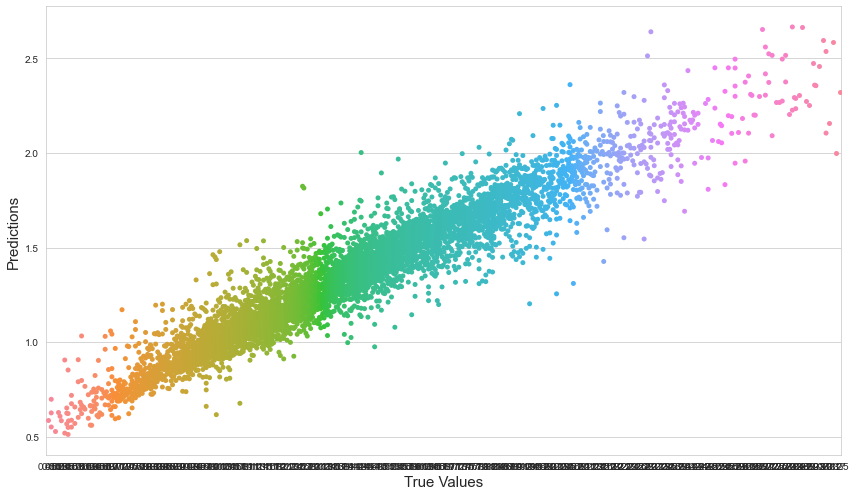

In [122]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

 ###  most imporatnt feature

<AxesSubplot:>

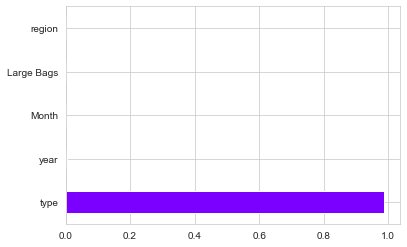

In [123]:
feat_importances = pd.Series(Final_mod.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

## Saving Model

In [124]:
import joblib
joblib.dump(Final_mod,'Avacado_Average_Price_Prediction_Final.pkl')

['Avacado_Average_Price_Prediction_Final.pkl']

## Now Building Machine Learning Model for classification alogrithm


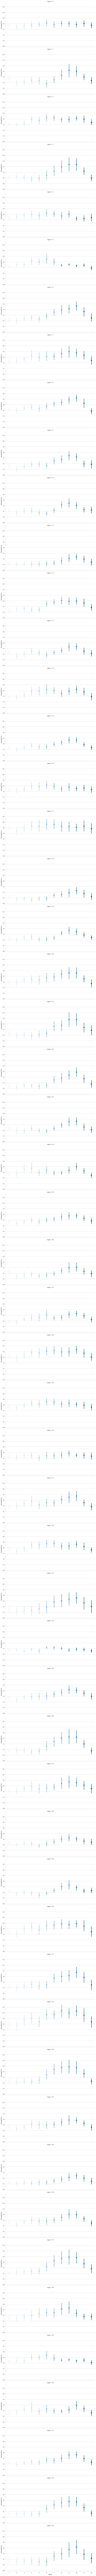

In [99]:
sns.factorplot('Month','AveragePrice',data=df,row='region',
               aspect=2,
               palette='Blues',
              )

## 1. We will do the data pre processing


In [88]:
x = df_new.drop("region",axis=1) # drop the region feature as it is our target feature
y = df_new["region"]

## Now Scaling the data using Standard Scaler Method

In [89]:
from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()
X_scaled = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

## Now using VIF function will remove the multi colinearity:

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["Features"]=X_scaled.columns
vif

vif_Features      Features
0       2.223236  AveragePrice
1      39.012025  Total Volume
2       5.479514         small
3       8.552311         large
4       3.974591            xl
5      21.993950    Total Bags
6       9.687285    Small Bags
7       2.698607    Large Bags
8       1.884073   XLarge Bags
9       3.986283          type
10      1.524081          year
11      1.139561         Month
12      1.001583           Day

In [91]:
#Droping Total Bags column as having VIF more than 10.
X_scaled = X_scaled.drop(["Total Bags"],axis=1)

In [92]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["Features"]=X_scaled.columns
vif

vif_Features      Features
0       2.163009  AveragePrice
1      27.908048  Total Volume
2       5.040826         small
3       8.022158         large
4       3.967647            xl
5       5.690562    Small Bags
6       2.026260    Large Bags
7       1.883834   XLarge Bags
8       3.908386          type
9       1.449398          year
10      1.128120         Month
11      1.001582           Day

In [93]:
#Droping Total Volume column as having VIF more than 10.
X_scaled = X_scaled.drop(["Total Volume"],axis=1)

#### Now the multicolinearity has removed from the dataset. So, we will proceed further for machine learning model building for classification

In [95]:
y.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Name: region, Length: 17782, dtype: bool

In [100]:
# now we will split the dataset

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state = 0)

In [105]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [107]:
from sklearn.neighbors import KNeighborsClassifier as KNN
maxAccu=0
maxRS=0
for i in range(1,500):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.30, random_state =i)
    mod = KNN()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.6078725398313027  on Random_state  211


In [108]:
# Now we will split the data into x train, y train 
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state =211)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (13336, 11)
Training target vector size: (13336,)
Test feature matrix size: (4446, 11)
Test target vector size: (4446,)


## 1. Logistic Regression

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state =211)
LR=LogisticRegression()
LR.fit(X_train,y_train)
predlr=LR.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predlr))
print('Confusion Matrix:',confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

Accuracy Score: 0.49212775528565
Confusion Matrix: [[51  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 56 ...  0  0  4]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  1  0 ...  0  0 11]]
              precision    recall  f1-score   support

           0       0.55      0.64      0.59        80
           1       0.21      0.36      0.26        83
           2       0.64      0.62      0.63        91
           3       0.56      0.41      0.47        98
           4       0.58      0.46      0.51       107
           5       0.49      0.46      0.47        80
           6       0.84      0.91      0.87        65
           7       0.55      0.70      0.61        79
           8       0.57      0.72      0.63        78
           9       0.47      0.75      0.58        79
          10       0.55      0.43      0.48        79
          11       0.59      0.64      0.62        84
          12       0.32      0.49      0.39        75
          13       0.37      0.36   

In [110]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(LR, X_scaled, y, cv =5)
print('\033[1m'+'Cross Validation Score', LR, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.31121732 0.30109643 0.44150731 0.44825647 0.2935883 ]
Mean CV Score : 0.35913316570598763
Std deviation : 0.07026917296370394


## 2.Decision Tree Classifier:

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state =211)
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.7917228969860549
Confusion Matrix: [[64  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  3]
 [ 0  0 77 ...  0  0  3]
 ...
 [ 0  0  0 ... 37  1  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  0 ...  0  0 61]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        80
           1       0.73      0.65      0.69        83
           2       0.96      0.85      0.90        91
           3       0.86      0.82      0.84        98
           4       0.92      0.87      0.89       107
           5       0.68      0.65      0.66        80
           6       0.92      0.92      0.92        65
           7       0.79      0.80      0.79        79
           8       0.87      0.97      0.92        78
           9       0.70      0.72      0.71        79
          10       0.71      0.76      0.74        79
          11       0.92      0.82      0.87        84
          12       0.84      0.84      0.84        75
          13       0.70      0.69 

In [118]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(DTC, X_scaled, y, cv =5)
print('\033[1m'+'Cross Validation Score', DTC, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.48580264 0.65335957 0.60208099 0.52502812 0.40326209]
Mean CV Score : 0.5339066837899129
Std deviation : 0.08761000583804641


## 3.Random Forest Classifier:

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state =211)
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.9203778677462888
Confusion Matrix: [[75  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  0]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  0  0 ...  0  0 78]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        80
           1       0.84      0.87      0.85        83
           2       1.00      0.97      0.98        91
           3       0.97      0.87      0.91        98
           4       0.97      0.97      0.97       107
           5       0.84      0.85      0.84        80
           6       1.00      0.98      0.99        65
           7       0.89      0.92      0.91        79
           8       0.97      1.00      0.99        78
           9       0.92      0.91      0.92        79
          10       0.85      0.96      0.90        79
          11       0.97      0.93      0.95        84
          12       0.95      0.99      0.97        75
          13       0.90      0.91 

In [120]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(RFC, X_scaled, y, cv =5)
print('\033[1m'+'Cross Validation Score', RFC, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.67894293 0.81669947 0.77502812 0.68813273 0.49943757]
Mean CV Score : 0.6916481640947538
Std deviation : 0.10927830431446768


## 4. Support Vector Classifier: 

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state =211)
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.7777777777777778
Confusion Matrix: [[76  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  2]
 [ 0  0 85 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  0  0 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.69      0.95      0.80        80
           1       0.48      0.54      0.51        83
           2       0.91      0.93      0.92        91
           3       0.89      0.76      0.82        98
           4       0.89      0.85      0.87       107
           5       0.77      0.62      0.69        80
           6       0.98      0.97      0.98        65
           7       0.72      0.76      0.74        79
           8       0.97      0.92      0.95        78
           9       0.70      0.81      0.75        79
          10       0.54      0.85      0.66        79
          11       0.77      0.79      0.78        84
          12       0.86      0.97      0.91        75
          13       0.59      0.65 

In [123]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(SV, X_scaled, y, cv =5)
print('\033[1m'+'Cross Validation Score', SV, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score SVC() :

CVScore : [0.56817543 0.58729266 0.60770529 0.5984252  0.4167604 ]
Mean CV Score : 0.5556717959453832
Std deviation : 0.07069360938217437


## Now we will do Hyper Para Tuning

In [124]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [125]:
print(RFC.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [179]:
Parameter={'max_depth': [None], 'max_features': ['auto'],'n_estimators': [50,100,150],'min_samples_split': [2]}

In [180]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,verbose=10)
GCV.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 1/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.907 total time=   2.7s
[CV 2/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 2/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.896 total time=   2.7s
[CV 3/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 3/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.901 total time=   2.8s
[CV 4/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 4/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.911 total time=   3.0s
[CV 5/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 5/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.906 total time=   2.7s
[CV 1/5; 2/12] STAR

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [75, 100, 150]},
             verbose=10)

In [185]:
Final_mod=RandomForestClassifier(max_features= 'auto',n_estimators= 150,criterion ='gini')
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test,predrf))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(y_test, predrf))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(y_test, predrf))

Final Random Forest Classifier
Accuracy Score :
 0.9203778677462888


Confusion matrix of Random Forest Classifier : 
 [[75  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  0]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  0  0 ...  0  0 78]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        80
           1       0.84      0.87      0.85        83
           2       1.00      0.97      0.98        91
           3       0.97      0.87      0.91        98
           4       0.97      0.97      0.97       107
           5       0.84      0.85      0.84        80
           6       1.00      0.98      0.99        65
           7       0.89      0.92      0.91        79
           8       0.97      1.00      0.99        78
           9       0.92      0.91      0.92        79
          10       0.85      0.96      0.90        79
          11       0.9

In [186]:
import joblib
joblib.dump(Final_mod,'Avacado_Classification_project_Prediction.pkl')

['Avacado_Classification_project_Prediction.pkl']

In [187]:
# Loading the saved model
model=joblib.load('Avacado_Classification_project_Prediction.pkl')

#Prediction
prediction = model.predict(X_test)
prediction

array([30,  3, 37, ..., 14, 20, 17])

In [188]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted    30     3    37    11    53     9    31    22     3    16  ...   
Actual       30     3    37    11    53     9    31    22     3    16  ...   

           4436  4437  4438  4439  4440  4441  4442  4443  4444  4445  
Predicted    32    33     8    21    25    22    27    14    20    17  
Actual       32    33     8    21    25    22    27    14    20    17  

[2 rows x 4446 columns]